In [2]:
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from scipy.stats import *

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
## 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [79]:
# 코로나 데이터
df_corona = pd.read_csv('./data/해외코로나데이터.csv')
del df_corona['Unnamed: 0']

In [80]:
df_corona

,일자,국가코드,확진자,누적 확진자,사망자,누적 사망자,월단위 일자,대륙명(영문),대륙명(한글),국가명(영문),국가명(한글)
0,2020-01-20,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
1,2020-01-21,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
2,2020-01-22,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
3,2020-01-23,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
4,2020-01-24,AF,0,0,0,0,2020-01,Asia,아시아,Afghanistan,아프카니스탄
...,...,...,...,...,...,...,...,...,...,...,...
187195,2022-08-08,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187196,2022-08-09,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187197,2022-08-10,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오
187198,2022-08-11,MO,0,791,0,6,2022-08,Asia,아시아,Macau,마카오


In [81]:
# 항공운임료 데이터
df_air_fare = pd.read_csv('./data/항공운임료.csv', index_col=0)

In [82]:
df_air_fare

,공항,년월,45kg,100kg,300kg,500kg,1톤,지역,국가명
0,Los_Angeles(LAX),2022-03,22.00,22.00,21.00,21.00,21.00,미주,미국
1,Los_Angeles(LAX),2022-02,20.00,20.00,19.00,19.00,19.00,미주,미국
2,Los_Angeles(LAX),2022-01,20.00,20.00,19.00,19.00,19.00,미주,미국
3,Los_Angeles(LAX),2021-12,22.00,22.00,21.00,21.00,21.00,미주,미국
4,Los_Angeles(LAX),2021-11,20.00,20.00,19.00,19.00,19.00,미주,미국
...,...,...,...,...,...,...,...,...,...
975,Singapore(SIN),2018-05,1.84,1.51,1.51,1.51,1.51,아시아,싱가포르
976,Singapore(SIN),2018-04,1.79,1.46,1.46,1.46,1.46,아시아,싱가포르
977,Singapore(SIN),2018-03,1.79,1.46,1.46,1.46,1.46,아시아,싱가포르
978,Singapore(SIN),2018-02,1.79,1.46,1.46,1.46,1.46,아시아,싱가포르


In [83]:
# 전세계 월단위 신규발생 확진자 수
global_month_cases = df_corona.groupby(by='월단위 일자')['확진자'].sum()['2020-01':]

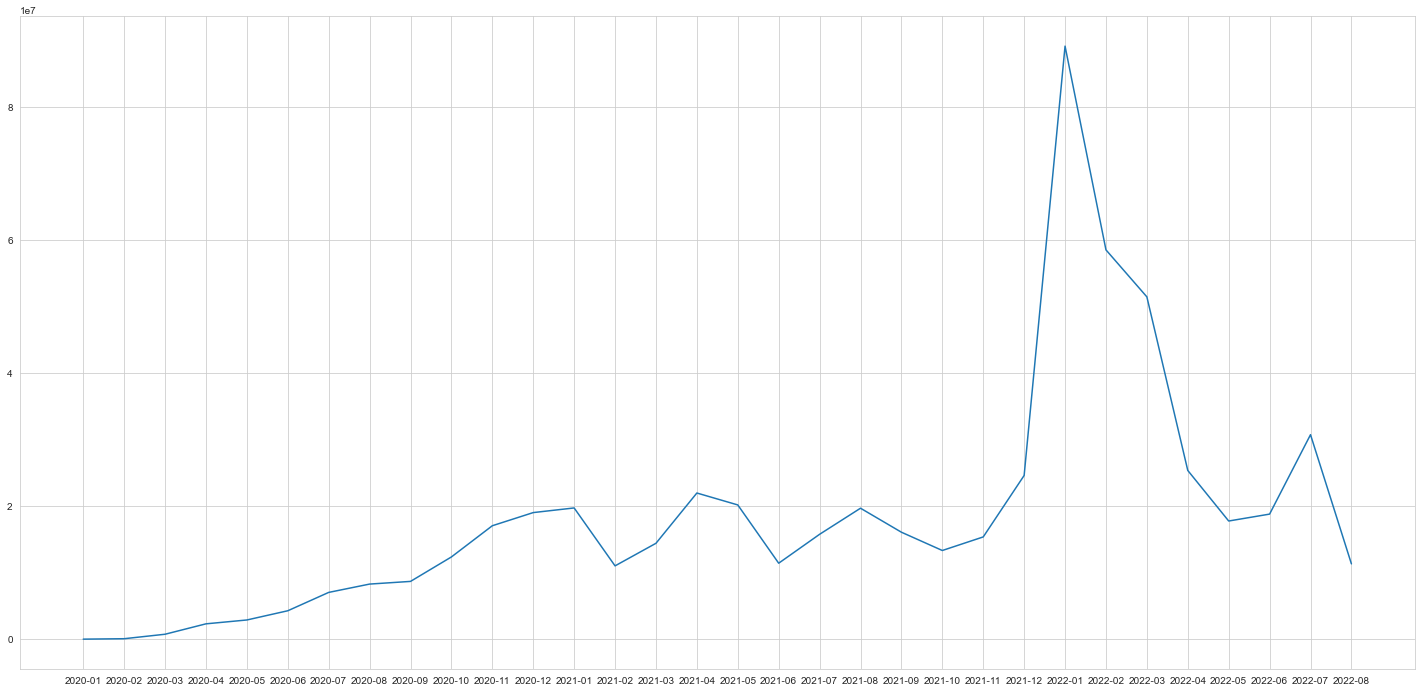

In [84]:
# 전세계 월단위 신규발생 확진자 수 그래프로 표현
sns.set_style('whitegrid')
plt.figure(figsize=(25,12))
plt.plot(global_month_cases.index, global_month_cases.values)
plt.show()

In [85]:
# 항공운임 데이터 전처리
df_air_date = df_air_fare.pivot_table(index='년월', columns='공항', values='1톤', aggfunc='mean')
df_air_date

공항,Atlanta(ATL),BEIJING,Chicago(ORD),Frankfrut(FRA),Hangzhou(HGH),Ho_Chi_Minh(SGN),Hong_Kong(HKG),Kansai(KIX),Kuala_Lumpur(KUL),Los_Angeles(LAX),Nagoya(NGO),Narita(NRT),New_York(JFK),Penang(PEN),Pudong(PVG),Qingdao(TAO),San_Francisco(SFO),Singapore(SIN),Tianjin(TSN)
년월,,,,,,,,,,,,,,,,,,,
2018-01,4.91,1.05,4.56,3.16,1.70,2.01,0.86,1.20,2.01,4.46,1.04,0.98,4.49,1.96,1.11,2.06,4.24,1.46,1.71
2018-02,4.91,1.05,4.48,3.08,1.70,1.92,0.86,1.20,2.01,4.35,1.04,0.97,4.35,1.96,1.11,2.07,4.23,1.46,1.70
2018-03,4.91,1.05,4.43,3.13,1.70,1.95,0.86,1.19,2.01,4.24,1.04,0.96,4.30,1.96,1.11,2.08,4.27,1.46,1.74
2018-04,4.91,1.05,4.33,3.12,1.70,1.90,0.86,1.19,2.01,4.14,1.04,0.96,4.17,1.96,1.11,2.08,4.26,1.46,1.74
2018-05,4.96,1.08,4.36,3.12,1.80,1.94,0.88,1.22,2.06,4.14,1.09,0.99,4.20,2.01,1.16,2.08,4.29,1.51,1.74
2018-06,4.91,1.04,4.30,3.07,1.70,1.90,0.84,1.18,2.01,4.09,1.04,0.95,4.20,1.96,1.11,2.05,4.21,1.46,1.73
2018-07,4.91,1.04,4.27,3.10,1.70,1.88,0.84,1.17,2.01,4.07,1.04,0.94,4.17,1.96,1.11,2.06,4.18,1.46,1.72
2018-08,4.96,1.07,4.36,3.04,1.80,1.92,0.87,1.21,2.06,4.13,1.09,0.98,4.18,2.01,1.16,2.09,4.21,1.51,1.75
2018-09,5.00,1.06,4.73,3.10,1.70,1.97,0.86,1.23,2.30,4.36,1.10,0.97,4.30,2.20,1.15,2.27,4.24,1.70,1.76


In [86]:
# 코로나 발생 전 항공운임 데이터
df_air_before_corona = df_air_date.loc[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01']]
df_air_before_corona

공항,Atlanta(ATL),BEIJING,Chicago(ORD),Frankfrut(FRA),Hangzhou(HGH),Ho_Chi_Minh(SGN),Hong_Kong(HKG),Kansai(KIX),Kuala_Lumpur(KUL),Los_Angeles(LAX),Nagoya(NGO),Narita(NRT),New_York(JFK),Penang(PEN),Pudong(PVG),Qingdao(TAO),San_Francisco(SFO),Singapore(SIN),Tianjin(TSN)
년월,,,,,,,,,,,,,,,,,,,
2018-01,4.91,1.05,4.56,3.16,1.70,2.01,0.86,1.20,2.01,4.46,1.04,0.98,4.49,1.96,1.11,2.06,4.24,1.46,1.71
2018-02,4.91,1.05,4.48,3.08,1.70,1.92,0.86,1.20,2.01,4.35,1.04,0.97,4.35,1.96,1.11,2.07,4.23,1.46,1.70
2018-03,4.91,1.05,4.43,3.13,1.70,1.95,0.86,1.19,2.01,4.24,1.04,0.96,4.30,1.96,1.11,2.08,4.27,1.46,1.74
2018-04,4.91,1.05,4.33,3.12,1.70,1.90,0.86,1.19,2.01,4.14,1.04,0.96,4.17,1.96,1.11,2.08,4.26,1.46,1.74
2018-05,4.96,1.08,4.36,3.12,1.80,1.94,0.88,1.22,2.06,4.14,1.09,0.99,4.20,2.01,1.16,2.08,4.29,1.51,1.74
2018-06,4.91,1.04,4.30,3.07,1.70,1.90,0.84,1.18,2.01,4.09,1.04,0.95,4.20,1.96,1.11,2.05,4.21,1.46,1.73
2018-07,4.91,1.04,4.27,3.10,1.70,1.88,0.84,1.17,2.01,4.07,1.04,0.94,4.17,1.96,1.11,2.06,4.18,1.46,1.72
2018-08,4.96,1.07,4.36,3.04,1.80,1.92,0.87,1.21,2.06,4.13,1.09,0.98,4.18,2.01,1.16,2.09,4.21,1.51,1.75
2018-09,5.00,1.06,4.73,3.10,1.70,1.97,0.86,1.23,2.30,4.36,1.10,0.97,4.30,2.20,1.15,2.27,4.24,1.70,1.76


In [87]:
# 코로나 발생 후 항공운임 데이터
df_air_after_corona = df_air_date.loc[['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03']]
df_air_after_corona

공항,Atlanta(ATL),BEIJING,Chicago(ORD),Frankfrut(FRA),Hangzhou(HGH),Ho_Chi_Minh(SGN),Hong_Kong(HKG),Kansai(KIX),Kuala_Lumpur(KUL),Los_Angeles(LAX),Nagoya(NGO),Narita(NRT),New_York(JFK),Penang(PEN),Pudong(PVG),Qingdao(TAO),San_Francisco(SFO),Singapore(SIN),Tianjin(TSN)
년월,,,,,,,,,,,,,,,,,,,
2020-02,6.12,1.58,3.90,2.91,1.75,2.08,1.14,1.33,3.55,3.84,1.45,1.17,4.03,2.8,1.40,2.16,4.46,2.10,2.00
2020-03,6.62,2.45,5.07,3.25,2.25,2.40,1.70,1.60,3.55,5.07,1.45,1.35,5.27,2.9,1.50,3.25,5.87,2.10,2.50
2020-04,7.35,2.60,6.10,3.65,2.25,2.60,1.85,1.75,3.65,7.00,1.60,1.50,11.00,3.0,1.75,3.25,6.60,2.45,2.65
2020-05,7.35,2.60,6.10,3.65,2.25,2.60,1.85,1.75,3.65,7.00,1.60,1.50,10.25,3.0,1.75,3.25,6.60,2.45,2.65
2020-06,7.35,3.55,7.10,3.60,3.79,2.70,1.50,1.65,2.80,8.00,1.40,1.15,11.25,2.8,3.00,3.30,7.60,2.90,2.45
2020-07,8.35,3.55,7.10,3.60,3.79,2.70,1.50,1.65,2.80,8.00,1.40,1.15,11.25,2.8,3.00,3.30,7.60,2.90,2.45
2020-08,8.35,3.55,7.10,3.60,3.79,2.70,1.50,1.65,2.80,8.00,1.40,1.15,11.25,2.8,3.00,3.30,7.60,2.90,2.45
2020-09,9.25,3.07,7.92,4.29,3.79,2.80,1.25,1.79,2.80,8.20,1.20,1.41,8.10,2.8,3.00,2.67,9.04,2.80,1.96
2020-10,11.75,2.88,11.14,4.91,3.79,2.80,1.37,1.83,2.80,9.16,1.20,1.50,10.72,2.8,3.00,2.67,9.49,2.80,2.09


In [88]:
# 전세계 월단위 신규발생 확진자 수
global_month_cases = pd.DataFrame(df_corona.groupby(by='월단위 일자')['확진자'].sum()['2020-02':'2022-03'])

In [89]:
# 전월 대비 증가율 구하기
global_month = global_month_cases['확진자']
global_month_cases_growth_rate = [0]
for i in range(1, len(global_month)):
    growth_rate = round((global_month[i] - global_month[i-1]) / global_month[i-1] * 100, 1)
    global_month_cases_growth_rate.append(growth_rate)
global_month_cases['전월대비증가율'] = global_month_cases_growth_rate

In [90]:
global_month_cases

,확진자,전월대비증가율
월단위 일자,,
2020-02,74833,0.0
2020-03,747267,898.6
2020-04,2311509,209.3
2020-05,2891921,25.1
2020-06,4277169,47.9
2020-07,7036270,64.5
2020-08,8288030,17.8
2020-09,8690268,4.9
2020-10,12367392,42.3


## 미국공항(장거리) 항공운임 분석

In [91]:
# 미국 공항 코로나 후 월단위 수출운임 데이터
df_fare_america_after = df_air_after_corona[['Atlanta(ATL)', 'Chicago(ORD)', 'Los_Angeles(LAX)', 'New_York(JFK)', 'San_Francisco(SFO)']]

In [92]:
america1 = df_fare_america_after['Atlanta(ATL)'].values
america2 = df_fare_america_after['Chicago(ORD)'].values
america3 = df_fare_america_after['Los_Angeles(LAX)'].values
america4 = df_fare_america_after['New_York(JFK)'].values
america5 = df_fare_america_after['San_Francisco(SFO)'].values
mean_america = []
for i in range(len(america1)):
    m = round((america1[i] + america2[i] + america3[i] + america4[i] + america5[i]) / 5, 2)
    mean_america.append(m)
df_fare_america_after['미국공항평균'] = mean_america

In [93]:
df_fare_america_after

공항,Atlanta(ATL),Chicago(ORD),Los_Angeles(LAX),New_York(JFK),San_Francisco(SFO),미국공항평균
년월,,,,,,
2020-02,6.12,3.90,3.84,4.03,4.46,4.47
2020-03,6.62,5.07,5.07,5.27,5.87,5.58
2020-04,7.35,6.10,7.00,11.00,6.60,7.61
2020-05,7.35,6.10,7.00,10.25,6.60,7.46
2020-06,7.35,7.10,8.00,11.25,7.60,8.26
2020-07,8.35,7.10,8.00,11.25,7.60,8.46
2020-08,8.35,7.10,8.00,11.25,7.60,8.46
2020-09,9.25,7.92,8.20,8.10,9.04,8.50
2020-10,11.75,11.14,9.16,10.72,9.49,10.45


In [94]:
# 미국의 월단위 신규발생 확진자 수
america_month_cases = pd.DataFrame(df_corona.loc[df_corona['국가명(한글)'] == '미국'].groupby(by='월단위 일자')['확진자'].sum()['2020-02':'2022-03'])

In [95]:
# 전월 대비 증가율 구하기
america_month = america_month_cases['확진자']
america_month_cases_growth_rate = [0]
for i in range(1, len(america_month)):
    growth_rate = round((america_month[i] - america_month[i-1]) / america_month[i-1] * 100, 1)
    america_month_cases_growth_rate.append(growth_rate)
america_month_cases['전월대비증가율'] = america_month_cases_growth_rate

In [96]:
america_month_cases

,확진자,전월대비증가율
월단위 일자,,
2020-02,61,0.0
2020-03,173354,284086.9
2020-04,857488,394.6
2020-05,755557,-11.9
2020-06,820558,8.6
2020-07,1884655,129.7
2020-08,1524586,-19.1
2020-09,1201711,-21.2
2020-10,1816138,51.1


#### 미국공항 수출운임과 코로나 데이터간의 상관관계 분석 및 상관행렬 표현

In [97]:
# 미국공항 수출운임과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values)) # (0.6914518178173505, 0.00018256545733427498)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.5 이상이기 때문에 강한 양의 상관관계를 지닌다.

# 미국공항 수출운임과 미국 코로나 데이터 간의 상관관계 분석
print(pearsonr(america_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values)) # (0.43632797416032626, 0.033039560163045864)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.2~0.5 사이이기 때문에 약한 양의 상관관계를 지닌다.

(0.71396767639439, 4.204982973904943e-05)
(0.4783411152443974, 0.013442092323231349)


<AxesSubplot:>

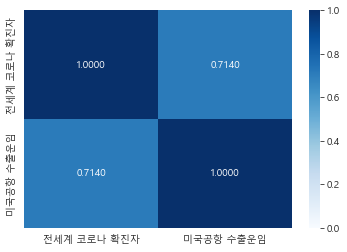

In [100]:
# 미국공항 수출운임과 전세계 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'전세계 코로나 확진자': global_month_cases['확진자'].values, '미국공항 수출운임':df_fare_america_after['미국공항평균'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

<AxesSubplot:>

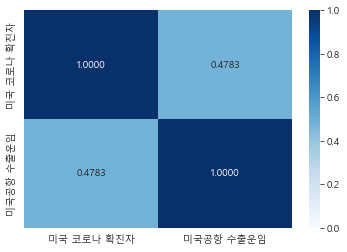

In [101]:
# 미국공항 수출운임과 미국 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'미국 코로나 확진자': america_month_cases['확진자'].values, '미국공항 수출운임':df_fare_america_after['미국공항평균'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

#### 미국공항 수출운임과 코로나 데이터간의 2차원데이터 시각화

In [102]:
# 미국공항 수출운임과 전세계 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(global_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(global_month_cases['확진자'].values.min(), global_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

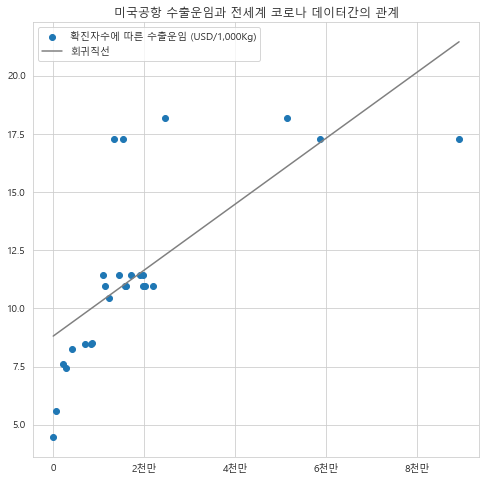

In [103]:
plt.figure(figsize=(8, 8))
plt.title('미국공항 수출운임과 전세계 코로나 데이터간의 관계')

# 산점도
plt.scatter(global_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values, label='확진자수에 따른 수출운임 (USD/1,000Kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper left')
plt.xticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

plt.show()

In [104]:
# 미국공항 수출운임과 전세계 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(america_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(america_month_cases['확진자'].values.min(), america_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

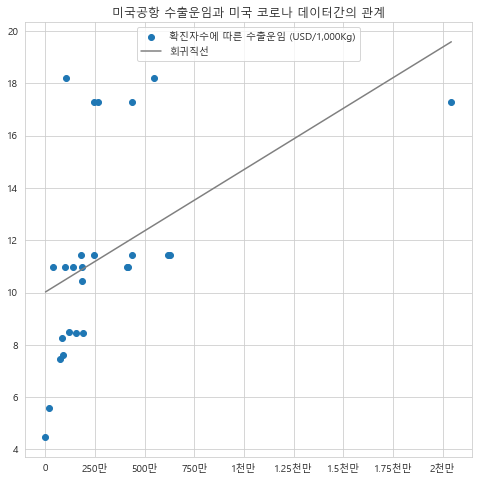

In [105]:
plt.figure(figsize=(8, 8))
plt.title('미국공항 수출운임과 미국 코로나 데이터간의 관계')

# 산점도
plt.scatter(america_month_cases['확진자'].values, df_fare_america_after['미국공항평균'].values, label='확진자수에 따른 수출운임 (USD/1,000Kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper center')
plt.xticks(ticks=np.arange(0, 22500000, 2500000), labels=['0','250만','500만','750만','1천만', '1.25천만', '1.5천만', '1.75천만', '2천만'])

plt.show()

#### 미국공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 미국공 코로나 확진자 데이터로 그래프 표현

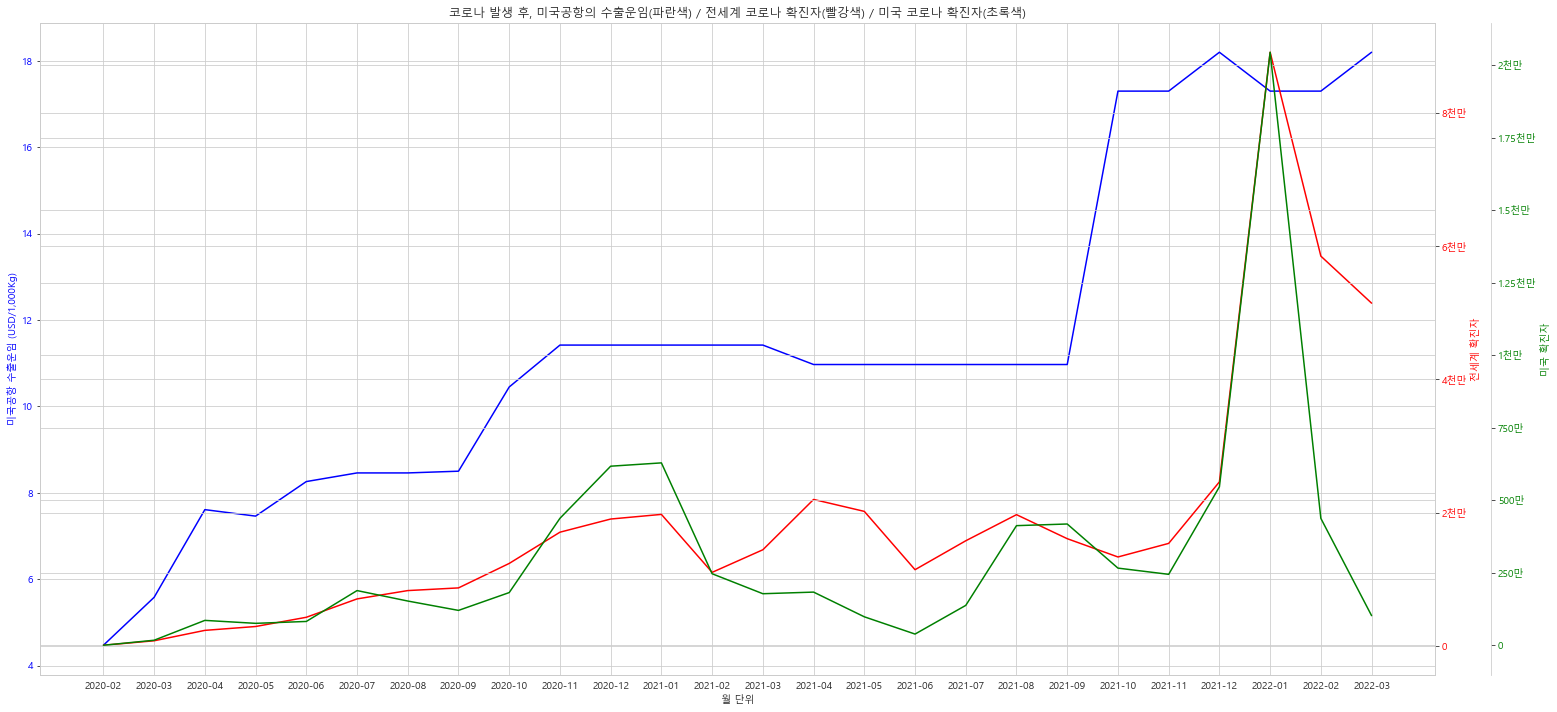

In [106]:
# 미국공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 미국공 코로나 확진자 데이터로 그래프 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_fare_america_after.index, df_fare_america_after['미국공항평균'].values, color=color1)
ax1.set_xlabel('월 단위')
ax1.set_ylabel('미국공항 수출운임 (USD/1,000Kg)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(america_month_cases.index, america_month_cases['확진자'], color=color3)
ax3.set_ylabel('미국 확진자', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) # 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 22500000, 2500000), labels=['0','250만','500만','750만','1천만', '1.25천만', '1.5천만', '1.75천만', '2천만'])

plt.title('코로나 발생 후, 미국공항의 수출운임(파란색) / 전세계 코로나 확진자(빨강색) / 미국 코로나 확진자(초록색)')
plt.show()

In [107]:
df_fare_america_before = df_air_before_corona[['Atlanta(ATL)', 'Chicago(ORD)', 'Los_Angeles(LAX)', 'New_York(JFK)', 'San_Francisco(SFO)']]

In [108]:
america1 = df_fare_america_before['Atlanta(ATL)'].values
america2 = df_fare_america_before['Chicago(ORD)'].values
america3 = df_fare_america_before['Los_Angeles(LAX)'].values
america4 = df_fare_america_before['New_York(JFK)'].values
america5 = df_fare_america_before['San_Francisco(SFO)'].values
mean_america = []
for i in range(len(america1)):
    m = round((america1[i] + america2[i] + america3[i] + america4[i] + america5[i]) / 5, 2)
    mean_america.append(m)
df_fare_america_before['미국공항평균'] = mean_america

In [109]:
df_fare_america_fin = pd.concat([df_fare_america_before, df_fare_america_after])
df_fare_america_fin

공항,Atlanta(ATL),Chicago(ORD),Los_Angeles(LAX),New_York(JFK),San_Francisco(SFO),미국공항평균
년월,,,,,,
2018-01,4.91,4.56,4.46,4.49,4.24,4.53
2018-02,4.91,4.48,4.35,4.35,4.23,4.46
2018-03,4.91,4.43,4.24,4.30,4.27,4.43
2018-04,4.91,4.33,4.14,4.17,4.26,4.36
2018-05,4.96,4.36,4.14,4.20,4.29,4.39
2018-06,4.91,4.30,4.09,4.20,4.21,4.34
2018-07,4.91,4.27,4.07,4.17,4.18,4.32
2018-08,4.96,4.36,4.13,4.18,4.21,4.37
2018-09,5.00,4.73,4.36,4.30,4.24,4.53


#### 미국공항 코로나 전/후 월단위 수출운임 그래프

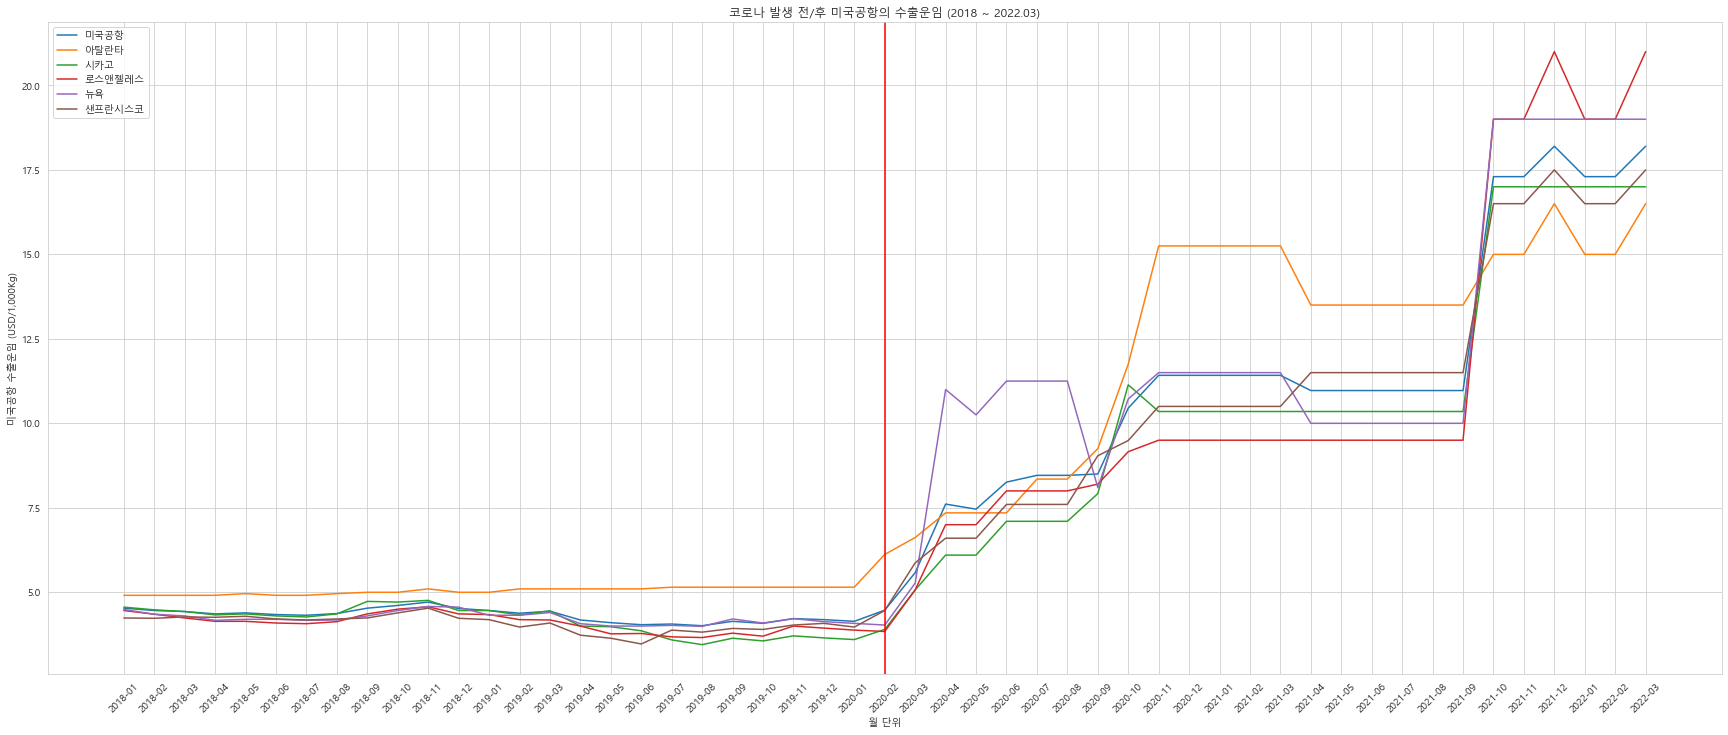

In [110]:
# 미국공항 코로나 전/후 월단위 수출운임 그래프
plt.figure(figsize=(30,12))

plt.plot(df_fare_america_fin.index, df_fare_america_fin['미국공항평균'], label='미국공항')
plt.plot(df_fare_america_fin['Atlanta(ATL)'].index, df_fare_america_fin['Atlanta(ATL)'].values, label='아탈란타')
plt.plot(df_fare_america_fin['Chicago(ORD)'].index, df_fare_america_fin['Chicago(ORD)'].values, label='시카고')
plt.plot(df_fare_america_fin['Los_Angeles(LAX)'].index, df_fare_america_fin['Los_Angeles(LAX)'].values, label='로스앤젤레스')
plt.plot(df_fare_america_fin['New_York(JFK)'].index, df_fare_america_fin['New_York(JFK)'].values, label='뉴욕')
plt.plot(df_fare_america_fin['San_Francisco(SFO)'].index, df_fare_america_fin['San_Francisco(SFO)'].values, label='샌프란시스코')
plt.xlabel('월 단위')
plt.ylabel('미국공항 수출운임 (USD/1,000Kg)')
plt.axvline(x='2020-02', color='r')
plt.legend()
plt.xticks(rotation=45)
plt.title('코로나 발생 전/후 미국공항의 수출운임 (2018 ~ 2022.03)')
plt.show()

#### 4년 동안의 연도별 미국공항 항공운임 추이

In [111]:
df_fare_america_year = df_fare_america_fin.reset_index()

In [112]:
tmp = list(df_fare_america_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_fare_america_year['연'] = tmp

In [113]:
df_fare_america_year

공항,년월,Atlanta(ATL),Chicago(ORD),Los_Angeles(LAX),New_York(JFK),San_Francisco(SFO),미국공항평균,연
0,2018-01,4.91,4.56,4.46,4.49,4.24,4.53,2018
1,2018-02,4.91,4.48,4.35,4.35,4.23,4.46,2018
2,2018-03,4.91,4.43,4.24,4.30,4.27,4.43,2018
3,2018-04,4.91,4.33,4.14,4.17,4.26,4.36,2018
4,2018-05,4.96,4.36,4.14,4.20,4.29,4.39,2018
5,2018-06,4.91,4.30,4.09,4.20,4.21,4.34,2018
6,2018-07,4.91,4.27,4.07,4.17,4.18,4.32,2018
7,2018-08,4.96,4.36,4.13,4.18,4.21,4.37,2018
8,2018-09,5.00,4.73,4.36,4.30,4.24,4.53,2018
9,2018-10,5.00,4.71,4.50,4.46,4.39,4.61,2018


In [114]:
df_fare_america_year_group = df_fare_america_year.groupby(by='연')['미국공항평균'].mean()
df_fare_america_year_group

연
2018     4.464167
2019     4.191667
2020     8.019167
2021    12.740000
2022    17.600000
Name: 미국공항평균, dtype: float64

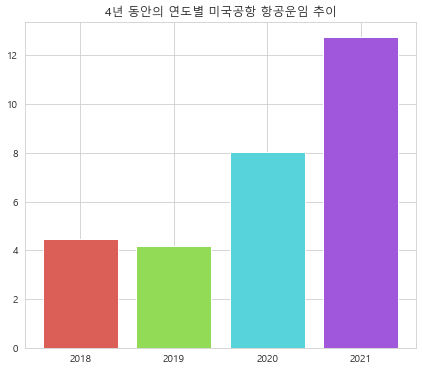

In [115]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_fare_america_year_group[0:4].index))
plt.bar(df_fare_america_year_group[0:4].index, df_fare_america_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 미국공항 항공운임 추이")
plt.show()

#### 쌍체표본 t검정

In [116]:
# 코로나 발생 전 1년간의 미국공항 항공운임과 코로나 발생 후 1년간의 미국공항 항공운임간의 쌍체표본 t검정 수행
fare_america_before = df_fare_america_fin.loc['2019-02':'2020-02']['미국공항평균'].values
fare_america_after = df_fare_america_fin.loc['2020-02':'2021-02']['미국공항평균'].values
print(fare_america_before)
print(fare_america_after)

[4.38 4.44 4.18 4.1  4.04 4.06 4.01 4.14 4.08 4.22 4.19 4.14 4.47]
[ 4.47  5.58  7.61  7.46  8.26  8.46  8.46  8.5  10.45 11.42 11.42 11.42
 11.42]


In [117]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(fare_america_after-fare_america_before)  # ShapiroResult(statistic=0.9000049233436584, pvalue=0.1337491124868393)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.9000049233436584, pvalue=0.1337491124868393)

In [118]:
# 귀무가설: 코로나로 인한 항공운임의 변화가 없음
# 대립가설 : 코로나로 인해 항공운임이 증가함
ttest_rel(fare_america_after, fare_america_before)  # Ttest_relResult(statistic=7.209441156516446, pvalue=1.0726970367576424e-05)
# pvalue가 0.05 보다 작으므로 귀무가설을 기각 -> 코로나로 인한 항공운임의 변화가 있음
# 미국공항으로의 항공운임은 코로나로 인해 증가함

Ttest_relResult(statistic=7.209441156516446, pvalue=1.0726970367576424e-05)

## 유럽공항(장거리) 항공운임 분석

In [119]:
germany_month_cases = pd.DataFrame(df_corona.loc[df_corona['국가명(한글)'] == '독일'].groupby(by='월단위 일자')['확진자'].sum()['2020-02':'2022-03'])

In [120]:
# 전월 대비 증가율 구하기
germany_month = germany_month_cases['확진자']
germany_month_cases_growth_rate = [0]
for i in range(1, len(germany_month)):
    growth_rate = round((germany_month[i] - germany_month[i-1]) / germany_month[i-1] * 100, 1)
    germany_month_cases_growth_rate.append(growth_rate)
germany_month_cases['전월대비증가율'] = germany_month_cases_growth_rate

In [121]:
germany_month_cases

,확진자,전월대비증가율
월단위 일자,,
2020-02,106,0.0
2020-03,67896,63952.8
2020-04,92785,36.7
2020-05,21069,-77.3
2020-06,12647,-40.0
2020-07,14741,16.6
2020-08,34232,132.2
2020-09,47749,39.5
2020-10,241469,405.7


In [122]:
# 프랑크푸르트(독일-유럽)공항의 코로나 후 월단위 수출운임 데이터
df_fare_germany_after = df_air_after_corona[['Frankfrut(FRA)']]
df_fare_germany_after

공항,Frankfrut(FRA)
년월,
2020-02,2.91
2020-03,3.25
2020-04,3.65
2020-05,3.65
2020-06,3.60
2020-07,3.60
2020-08,3.60
2020-09,4.29
2020-10,4.91


#### 독일공항 수출운임과 코로나 데이터간의 상관관계 분석 및 상관행렬 표현

In [123]:
# 독일공항 수출운임과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values))  # (0.6627948258665455, 0.0004165715200082811)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.5 이상이기 때문에 강한 양의 상관관계를 지닌다.

# 독일공항 수출운임과 독일 코로나 데이터 간의 상관관계 분석
print(pearsonr(germany_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values)) # (0.6210286205200888, 0.001201391213507445)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.5 이상이기 때문에 강한 양의 상관관계를 지닌다.

(0.6934515354726376, 8.570268495362911e-05)
(0.6194361664676848, 0.0007396612374147111)


<AxesSubplot:>

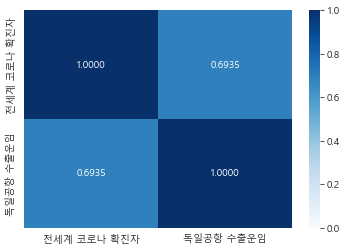

In [124]:
# 독일공항 수출운임과 전세계 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'전세계 코로나 확진자': global_month_cases['확진자'].values, '독일공항 수출운임':df_fare_germany_after['Frankfrut(FRA)'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

<AxesSubplot:>

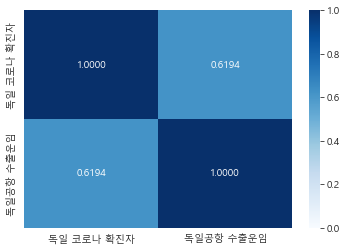

In [125]:
# 독일공항 수출운임과 독일 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'독일 코로나 확진자': germany_month_cases['확진자'].values, '독일공항 수출운임':df_fare_germany_after['Frankfrut(FRA)'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

#### 독일공항 수출운임과 코로나 데이터간의 2차원데이터 시각화

In [126]:
# 독일공항 수출운임과 전세계 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(global_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(global_month_cases['확진자'].values.min(), global_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

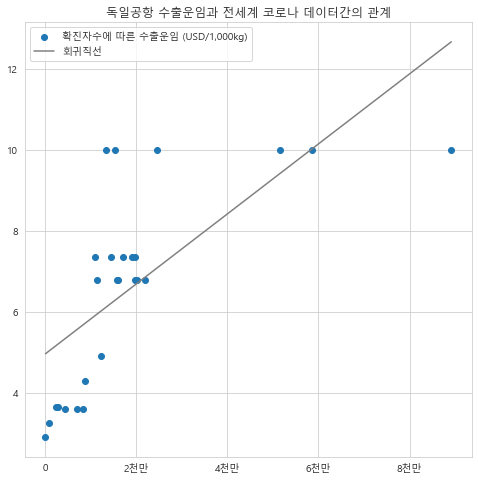

In [127]:
plt.figure(figsize=(8, 8))
plt.title('독일공항 수출운임과 전세계 코로나 데이터간의 관계')

# 산점도
plt.scatter(global_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values, label='확진자수에 따른 수출운임 (USD/1,000kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper left')
plt.xticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

plt.show()

In [128]:
# 독일공항 수출운임과 독일 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(germany_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(germany_month_cases['확진자'].values.min(), germany_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

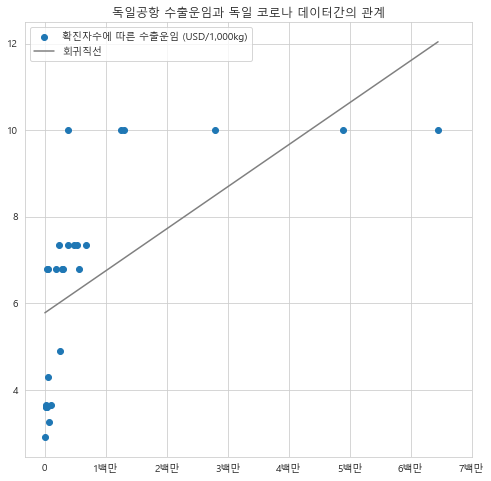

In [129]:
plt.figure(figsize=(8, 8))
plt.title('독일공항 수출운임과 독일 코로나 데이터간의 관계')

# 산점도
plt.scatter(germany_month_cases['확진자'].values, df_fare_germany_after['Frankfrut(FRA)'].values, label='확진자수에 따른 수출운임 (USD/1,000kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper left')
plt.xticks(ticks=np.arange(0, 8000000, 1000000), labels=['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만'])

plt.show()

#### 독일공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 그래프 표현

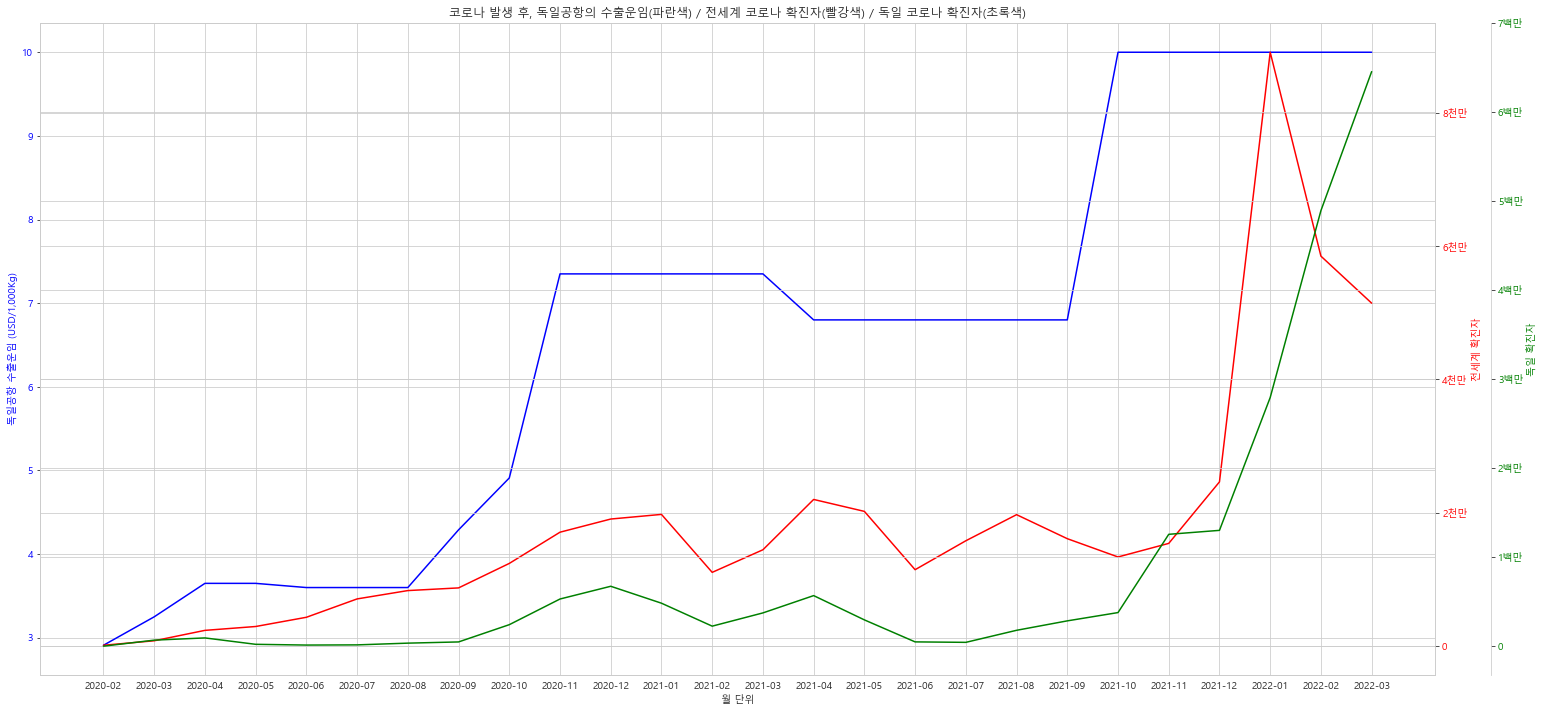

In [130]:
# 독일공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 그래프 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_fare_germany_after.index, df_fare_germany_after['Frankfrut(FRA)'].values, color=color1)
ax1.set_xlabel('월 단위')
ax1.set_ylabel('독일공항 수출운임 (USD/1,000Kg)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(germany_month_cases.index, germany_month_cases['확진자'], color=color3)
ax3.set_ylabel('독일 확진자', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) # 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 8000000, 1000000), labels=['0','1백만','2백만','3백만','4백만','5백만','6백만','7백만'])

plt.title('코로나 발생 후, 독일공항의 수출운임(파란색) / 전세계 코로나 확진자(빨강색) / 독일 코로나 확진자(초록색)')
plt.show()

In [131]:
df_fare_germany_before = df_air_before_corona[['Frankfrut(FRA)']]

In [132]:
df_eu_fin = pd.concat([df_fare_germany_before, df_fare_germany_after])
df_eu_fin

공항,Frankfrut(FRA)
년월,
2018-01,3.16
2018-02,3.08
2018-03,3.13
2018-04,3.12
2018-05,3.12
2018-06,3.07
2018-07,3.10
2018-08,3.04
2018-09,3.10


#### 유럽(독일)공항 코로나 전/후 월단위 수출운임 그래프

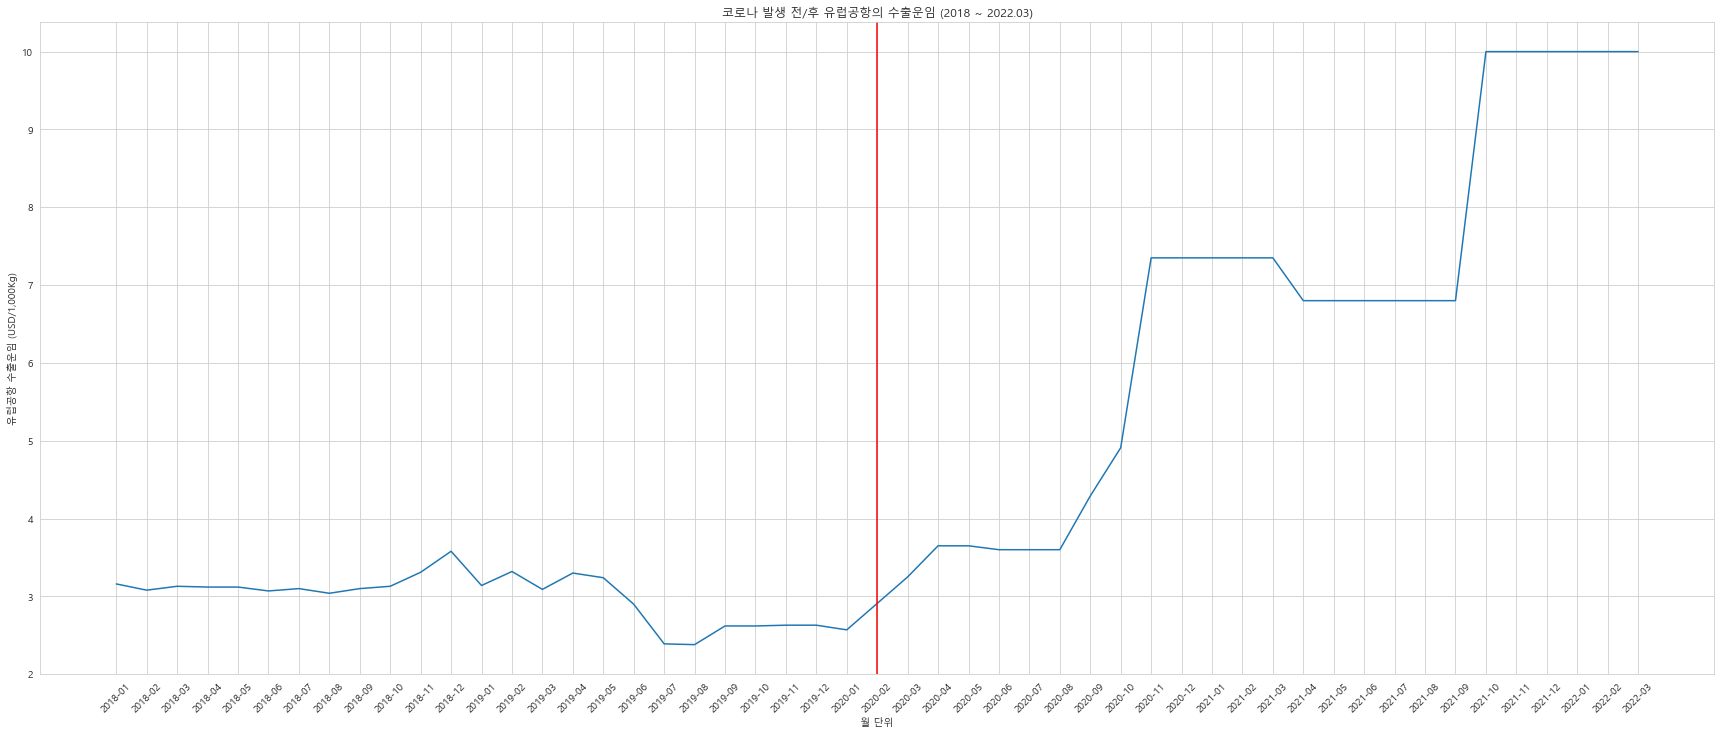

In [133]:
# 유럽(독일)공항 코로나 전/후 월단위 수출운임 그래프
plt.figure(figsize=(30,12))

plt.plot(df_eu_fin.index, df_eu_fin['Frankfrut(FRA)'])
plt.xlabel('월 단위')
plt.ylabel('유럽공항 수출운임 (USD/1,000Kg)')
plt.axvline(x='2020-02', color='r')

plt.xticks(rotation=45)
plt.title('코로나 발생 전/후 유럽공항의 수출운임 (2018 ~ 2022.03)')
plt.show()

#### 4년 동안의 연도별 유럽공항 항공운임 추이

In [134]:
df_fare_europe_year = df_eu_fin.reset_index()

In [135]:
tmp = list(df_fare_europe_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_fare_europe_year['연'] = tmp

In [136]:
df_fare_europe_year


공항,년월,Frankfrut(FRA),연
0,2018-01,3.16,2018
1,2018-02,3.08,2018
2,2018-03,3.13,2018
3,2018-04,3.12,2018
4,2018-05,3.12,2018
5,2018-06,3.07,2018
6,2018-07,3.10,2018
7,2018-08,3.04,2018
8,2018-09,3.10,2018
9,2018-10,3.13,2018


In [137]:
df_fare_europe_year_group = df_fare_europe_year.groupby(by='연')['Frankfrut(FRA)'].mean()
df_fare_europe_year_group

연
2018     3.161667
2019     2.855000
2020     4.227500
2021     7.737500
2022    10.000000
Name: Frankfrut(FRA), dtype: float64

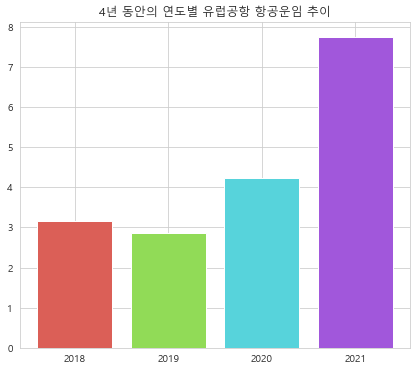

In [138]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_fare_europe_year_group[0:4].index))
plt.bar(df_fare_europe_year_group[0:4].index, df_fare_europe_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 유럽공항 항공운임 추이")
plt.show()

#### 쌍체표본 t검정

In [139]:
# 코로나 발생 전 1년간의 유럽공항 항공운임과 코로나 발생 후 1년간의 유럽공항 항공운임간의 쌍체표본 t검정 수행
fare_eu_before = df_eu_fin.loc['2019-02':'2020-02']['Frankfrut(FRA)'].values
fare_eu_after = df_eu_fin.loc['2020-02':'2021-02']['Frankfrut(FRA)'].values
print(fare_eu_before)
print(fare_eu_after)

[3.32 3.09 3.3  3.24 2.9  2.39 2.38 2.62 2.62 2.63 2.63 2.57 2.91]
[2.91 3.25 3.65 3.65 3.6  3.6  3.6  4.29 4.91 7.35 7.35 7.35 7.35]


In [140]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
kstest(fare_eu_after-fare_eu_before, 'norm')  # shapiro보다 덜 엄격한 kstest -> 정규성검정
# pvalue가 0.05보다 작으므로 귀무가설 기각 -> 정규성을 띄지 않는다
shapiro(fare_eu_after-fare_eu_before)  # ShapiroResult(statistic=0.8455483317375183, pvalue=0.024966983124613762)
# pvalue가 0.05보다 작으므로 귀무가설 기각 -> 정규성을 띄지 않는다

ShapiroResult(statistic=0.8455483317375183, pvalue=0.024966983124613762)

In [141]:
# 귀무가설: 코로나로 인한 항공운임의 변화가 없음
# 대립가설 : 코로나로 인해 항공운임이 증가함
ttest_rel(fare_eu_after, fare_eu_before)  # Ttest_relResult(statistic=3.7185801118203714, pvalue=0.0029344659333992306)
# pvalue가 0.05 보다 작으므로 귀무가설을 기각 -> 코로나로 인한 항공운임의 변화가 있음
# 유럽공항으로의 항공운임은 코로나로 인해 증가함

Ttest_relResult(statistic=3.7185801118203714, pvalue=0.0029344659333992306)

## (장거리) 미국,유럽 공항 항공운임 분석

In [142]:
df_fare_long_dis = pd.concat([df_fare_america_fin, df_eu_fin], axis=1)

In [143]:
df_fare_long_dis['장거리평균'] = (df_fare_long_dis['미국공항평균'] + df_fare_long_dis['Frankfrut(FRA)']) / 2

In [144]:
df_fare_long_dis

공항,Atlanta(ATL),Chicago(ORD),Los_Angeles(LAX),New_York(JFK),San_Francisco(SFO),미국공항평균,Frankfrut(FRA),장거리평균
년월,,,,,,,,
2018-01,4.91,4.56,4.46,4.49,4.24,4.53,3.16,3.845
2018-02,4.91,4.48,4.35,4.35,4.23,4.46,3.08,3.770
2018-03,4.91,4.43,4.24,4.30,4.27,4.43,3.13,3.780
2018-04,4.91,4.33,4.14,4.17,4.26,4.36,3.12,3.740
2018-05,4.96,4.36,4.14,4.20,4.29,4.39,3.12,3.755
2018-06,4.91,4.30,4.09,4.20,4.21,4.34,3.07,3.705
2018-07,4.91,4.27,4.07,4.17,4.18,4.32,3.10,3.710
2018-08,4.96,4.36,4.13,4.18,4.21,4.37,3.04,3.705
2018-09,5.00,4.73,4.36,4.30,4.24,4.53,3.10,3.815


In [145]:
america_month_cases.rename(columns={'확진자':'미국확진자'}, inplace=True)
germany_month_cases.rename(columns={'확진자':'독일확진자'}, inplace=True)

In [146]:
long_dis_month_cases = pd.concat([america_month_cases[['미국확진자']], germany_month_cases[['독일확진자']]], axis=1)

In [147]:
long_dis_month_cases['총 확진자'] = long_dis_month_cases['미국확진자'] + long_dis_month_cases['독일확진자']

In [148]:
long_dis_month_cases

,미국확진자,독일확진자,총 확진자
월단위 일자,,,
2020-02,61,106,167
2020-03,173354,67896,241250
2020-04,857488,92785,950273
2020-05,755557,21069,776626
2020-06,820558,12647,833205
2020-07,1884655,14741,1899396
2020-08,1524586,34232,1558818
2020-09,1201711,47749,1249460
2020-10,1816138,241469,2057607


### (장거리) 미국,독일공항 코로나 전/후 월단위 수출운임 그래프

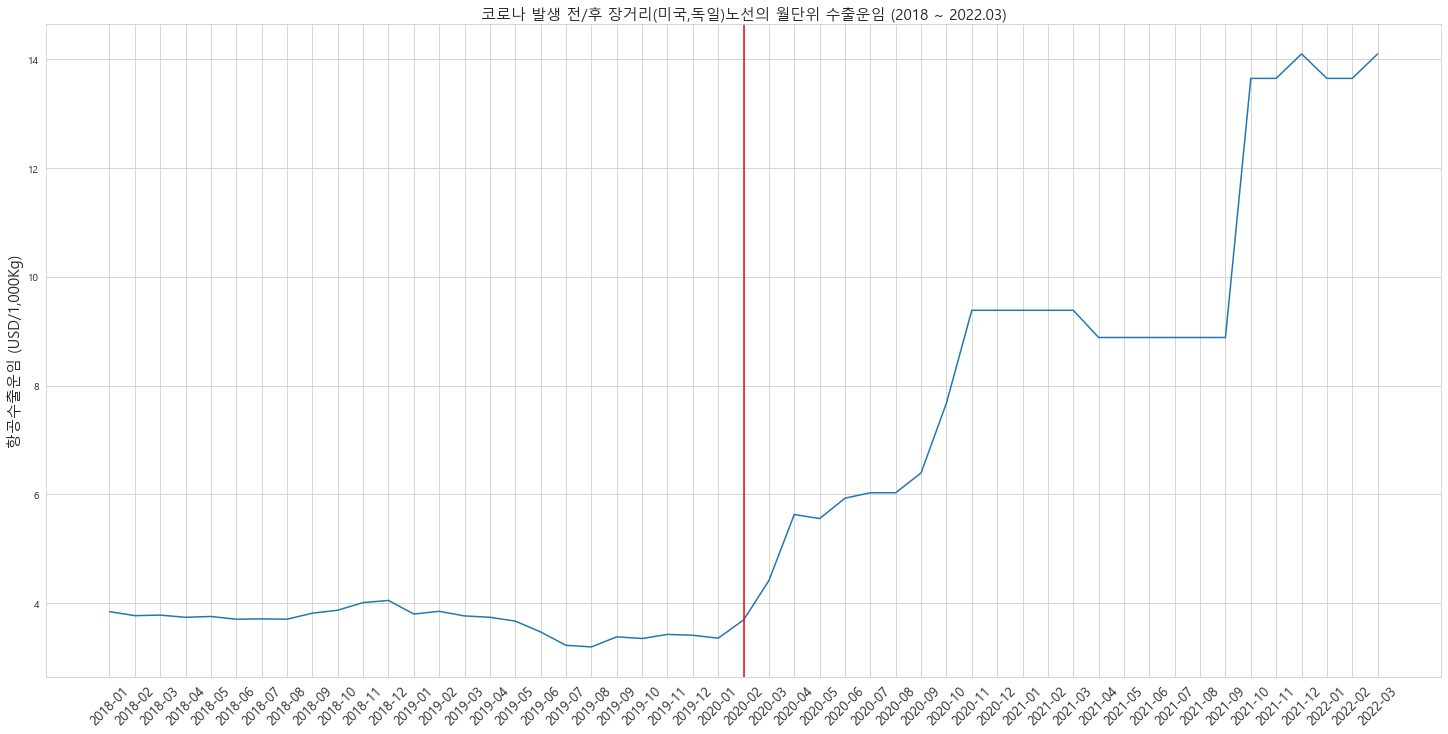

In [324]:
# (장거리) 미국,독일공항 코로나 전/후 월단위 수출운임 그래프
plt.figure(figsize=(25,12))

plt.plot(df_fare_long_dis.index, df_fare_long_dis['장거리평균'])
plt.ylabel('항공수출운임 (USD/1,000Kg)', fontsize=15)
plt.axvline(x='2020-02', color='r')

plt.xticks(rotation=45, fontsize=13)
plt.title('코로나 발생 전/후 장거리(미국,독일)노선의 월단위 수출운임 (2018 ~ 2022.03)', fontsize=15)
plt.savefig("./picture/fare1.png",dpi=300)
plt.show()


### 4년 동안의 연도별 장거리노선 항공운임 추이

In [162]:
df_fare_long_dis_year = df_fare_long_dis.reset_index()

In [163]:
tmp = list(df_fare_long_dis_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_fare_long_dis_year['연'] = tmp

In [164]:
df_fare_long_dis_year

공항,년월,Atlanta(ATL),Chicago(ORD),Los_Angeles(LAX),New_York(JFK),San_Francisco(SFO),미국공항평균,Frankfrut(FRA),장거리평균,연
0,2018-01,4.91,4.56,4.46,4.49,4.24,4.53,3.16,3.845,2018
1,2018-02,4.91,4.48,4.35,4.35,4.23,4.46,3.08,3.770,2018
2,2018-03,4.91,4.43,4.24,4.30,4.27,4.43,3.13,3.780,2018
3,2018-04,4.91,4.33,4.14,4.17,4.26,4.36,3.12,3.740,2018
4,2018-05,4.96,4.36,4.14,4.20,4.29,4.39,3.12,3.755,2018
5,2018-06,4.91,4.30,4.09,4.20,4.21,4.34,3.07,3.705,2018
6,2018-07,4.91,4.27,4.07,4.17,4.18,4.32,3.10,3.710,2018
7,2018-08,4.96,4.36,4.13,4.18,4.21,4.37,3.04,3.705,2018
8,2018-09,5.00,4.73,4.36,4.30,4.24,4.53,3.10,3.815,2018
9,2018-10,5.00,4.71,4.50,4.46,4.39,4.61,3.13,3.870,2018


In [165]:
df_fare_long_dis_year_group = df_fare_long_dis_year.groupby(by='연')['장거리평균'].mean()
df_fare_long_dis_year_group

연
2018     3.812917
2019     3.523333
2020     6.123333
2021    10.238750
2022    13.800000
Name: 장거리평균, dtype: float64

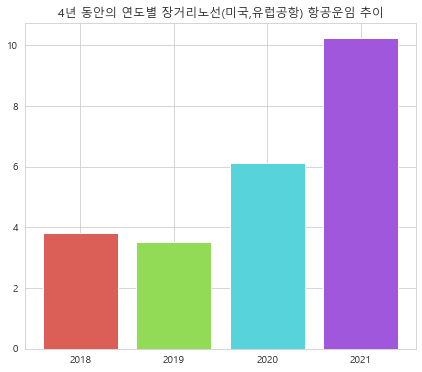

In [307]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_fare_long_dis_year_group[0:4].index))
plt.bar(df_fare_long_dis_year_group[0:4].index, df_fare_long_dis_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 장거리노선(미국,유럽공항) 항공운임 추이")
plt.savefig("./picture/fare2.png",dpi=300)
plt.show()

### (장거리) 미국,독일 코로나 이후 월단위 항공수출운임 그래프 / 전세계 코로나 확진자 데이터 / 미국,독일 코로나 확진자 데이터로 그래프 표현

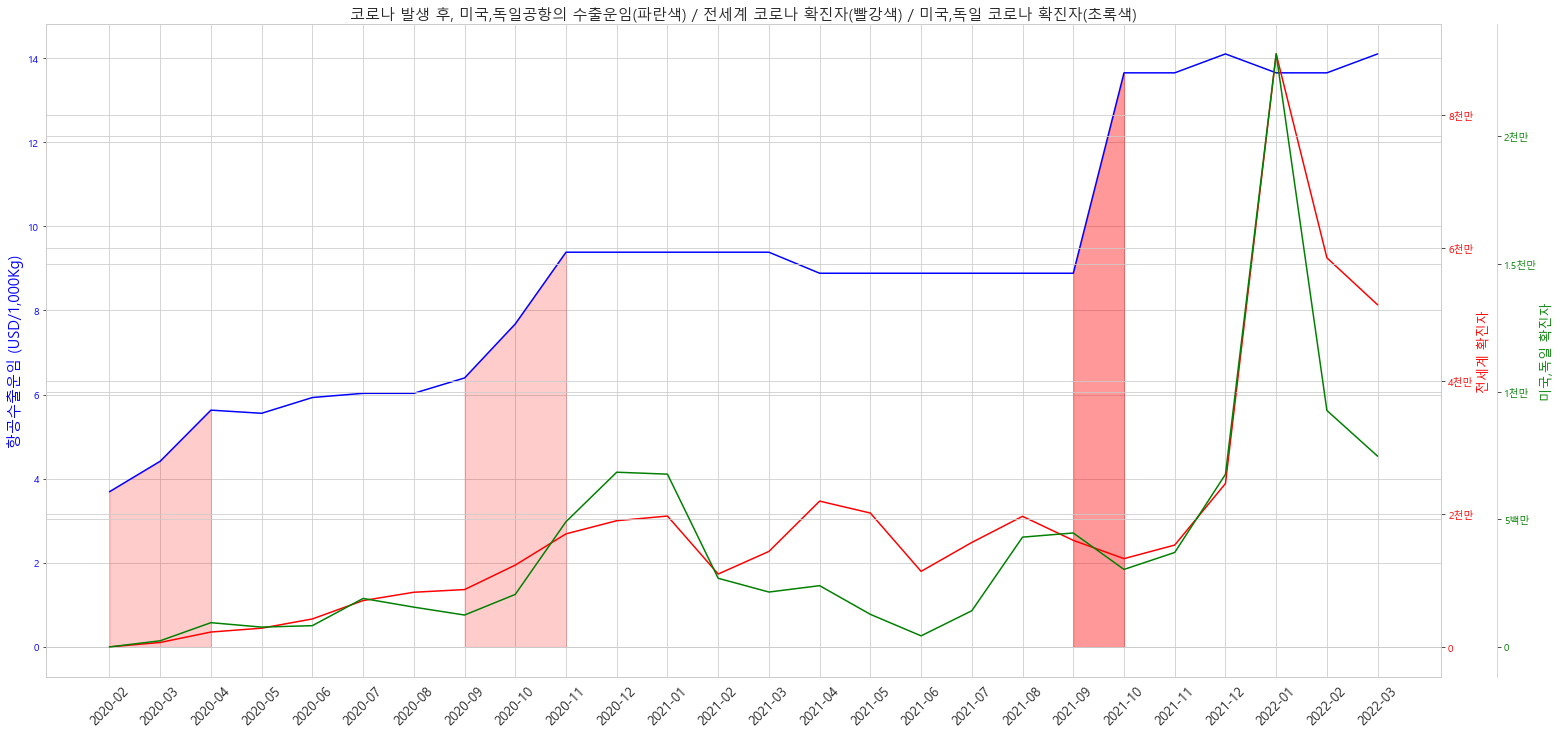

In [351]:
# 장거리노선(미국,독일)공항 코로나 이후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 미국,독일 코로나 확진자 데이터로 그래프 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_fare_long_dis.loc['2020-02':].index, df_fare_long_dis.loc['2020-02':]['장거리평균'].values, color=color1)
ax1.set_ylabel('항공수출운임 (USD/1,000Kg)', color=color1, fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.fill_between(df_fare_long_dis.loc['2020-02':'2020-04'].index, df_fare_long_dis.loc['2020-02':'2020-04']['장거리평균'].values, color='red', alpha=0.2)
ax1.fill_between(df_fare_long_dis.loc['2020-09':'2020-11'].index, df_fare_long_dis.loc['2020-09':'2020-11']['장거리평균'].values, color='red', alpha=0.2)
ax1.fill_between(df_fare_long_dis.loc['2021-09':'2021-10'].index, df_fare_long_dis.loc['2021-09':'2021-10']['장거리평균'].values, color='red', alpha=0.4)
ax1.tick_params(axis = 'x', labelsize = 13, rotation=45)

color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(long_dis_month_cases.index, long_dis_month_cases['총 확진자'], color=color3)
ax3.set_ylabel('미국,독일 확진자', color=color3, fontsize=13)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) # 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 25000000, 5000000), labels=['0','5백만','1천만','1.5천만','2천만'])

plt.title('코로나 발생 후, 미국,독일공항의 수출운임(파란색) / 전세계 코로나 확진자(빨강색) / 미국,독일 코로나 확진자(초록색)', fontsize=15)
plt.savefig("./picture/fare3.png",dpi=300)
plt.show()

### (장거리) 미국,독일공항 수출운임과 코로나 데이터간의 상관관계 분석 및 상관행렬 표현

In [168]:
# (장거리) 미국,독일공항 수출운임과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values))  # (0.7128945519564323, 4.3710349779905926e-05)
# p-value가 0.05미만이기 때문에 유의한 상관성이 존재하고, 상관계수가 0.5 이상이기 때문에 강한 양의 상관관계를 지닌다.

# (장거리) 미국,독일공항 수출운임과 미국,독일 코로나 데이터 간의 상관관계 분석
print(pearsonr(long_dis_month_cases['총 확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values)) # (0.6368555321765139, 0.0004682194990335932)
# p-value가 0.05미만이기 때문에 유의한 상관성이 존재하고, 상관계수가 0.5 이상이기 때문에 강한 양의 상관관계를 지닌다.

(0.7128945519564323, 4.3710349779905926e-05)
(0.6368555321765139, 0.0004682194990335932)


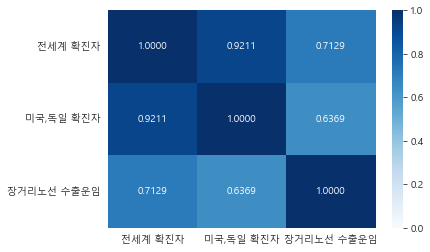

In [326]:
# (장거리) 미국,독일공항 수출운임과 전세계 코로나 데이터, 미국,독일 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'전세계 확진자': global_month_cases['확진자'].values, '미국,독일 확진자':long_dis_month_cases['총 확진자'].values ,'장거리노선 수출운임':df_fare_long_dis.loc['2020-02':]['장거리평균'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)
plt.savefig("./picture/fare_relation1.png",dpi=300)

### (장거리) 미국,독일공항 수출운임과 코로나 데이터간의 2차원데이터 시각화

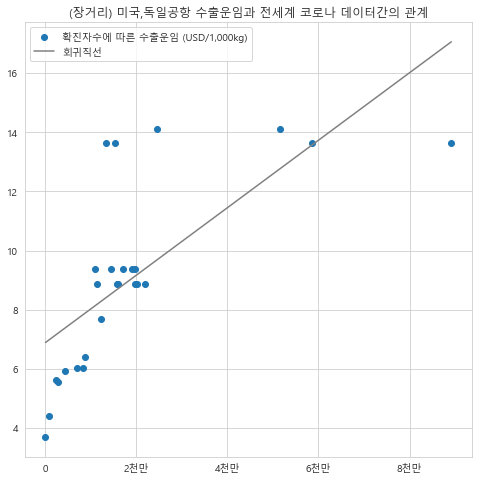

In [327]:
# (장거리) 미국,독일공항 수출운임과 전세계 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(global_month_cases['확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(global_month_cases['확진자'].values.min(), global_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

plt.figure(figsize=(8, 8))
plt.title('(장거리) 미국,독일공항 수출운임과 전세계 코로나 데이터간의 관계')
# 산점도
plt.scatter(global_month_cases['확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values, label='확진자수에 따른 수출운임 (USD/1,000kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper left')
plt.xticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])
plt.savefig("./picture/fare_relation2.png",dpi=300)
plt.show()

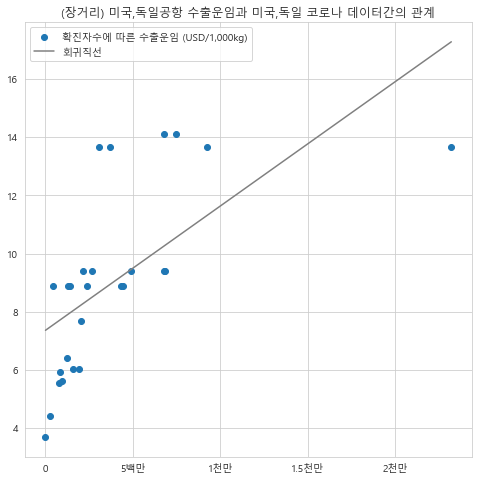

In [328]:
# (장거리) 미국,독일공항 수출운임과 미국,독일 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(long_dis_month_cases['총 확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(long_dis_month_cases['총 확진자'].values.min(), long_dis_month_cases['총 확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

plt.figure(figsize=(8, 8))
plt.title('(장거리) 미국,독일공항 수출운임과 미국,독일 코로나 데이터간의 관계')
# 산점도
plt.scatter(long_dis_month_cases['총 확진자'].values, df_fare_long_dis.loc['2020-02':]['장거리평균'].values, label='확진자수에 따른 수출운임 (USD/1,000kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper left')
plt.xticks(ticks=np.arange(0, 25000000, 5000000), labels=['0','5백만','1천만','1.5천만','2천만'])
plt.savefig("./picture/fare_relation3.png",dpi=300)
plt.show()

### 코로나 발생 전 1년간의 장거리노선 항공운임과 코로나 발생 후 1년간의 장거리노선 항공운임간의 쌍체표본 t검정 수행

In [172]:
# 코로나 전(2019-02 ~ 2020-02) 장거리노선의 항공운임데이터
fare_long_before = df_fare_long_dis.loc['2019-02':'2020-02']['장거리평균'].values
# 코로나 후(2020-02 ~ 2021-02) 장거리노선의 항공운임데이터
fare_long_after = df_fare_long_dis.loc['2020-02':'2021-02']['장거리평균'].values
print(fare_long_before)
print(fare_long_after)

[3.85  3.765 3.74  3.67  3.47  3.225 3.195 3.38  3.35  3.425 3.41  3.355
 3.69 ]
[3.69  4.415 5.63  5.555 5.93  6.03  6.03  6.395 7.68  9.385 9.385 9.385
 9.385]


In [173]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(fare_long_after-fare_long_before)  # ShapiroResult(statistic=0.913183331489563, pvalue=0.20270603895187378)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.913183331489563, pvalue=0.20270603895187378)

In [174]:
# 귀무가설: 코로나로 인한 항공운임의 변화가 없음
# 대립가설 : 코로나로 인해 항공운임이 증가함
ttest_rel(fare_long_after, fare_long_before)  # Ttest_relResult(statistic=5.740070754189229, pvalue=9.307349228401051e-05)
# pvalue가 0.05 보다 작으므로 귀무가설을 기각 -> 코로나로 인한 항공운임의 변화가 있음
# 장거리노선으로의 항공운임은 코로나로 인해 증가함

Ttest_relResult(statistic=5.740070754189229, pvalue=9.307349228401051e-05)

## (중/단거리) 아시아 공항 항공운임 분석

In [175]:
# 아시아(중/단거리) 공항 코로나 후 월단위 수출운임 데이터
df_fare_asia_after = df_air_after_corona[['BEIJING', 'Hangzhou(HGH)', 'Pudong(PVG)', 'Qingdao(TAO)', 'Tianjin(TSN)','Ho_Chi_Minh(SGN)','Penang(PEN)', 'Kuala_Lumpur(KUL)', 'Singapore(SIN)','Hong_Kong(HKG)', 'Narita(NRT)', 'Nagoya(NGO)','Kansai(KIX)']]
df_fare_asia_after 

공항,BEIJING,Hangzhou(HGH),Pudong(PVG),Qingdao(TAO),Tianjin(TSN),Ho_Chi_Minh(SGN),Penang(PEN),Kuala_Lumpur(KUL),Singapore(SIN),Hong_Kong(HKG),Narita(NRT),Nagoya(NGO),Kansai(KIX)
년월,,,,,,,,,,,,,
2020-02,1.58,1.75,1.40,2.16,2.00,2.08,2.8,3.55,2.10,1.14,1.17,1.45,1.33
2020-03,2.45,2.25,1.50,3.25,2.50,2.40,2.9,3.55,2.10,1.70,1.35,1.45,1.60
2020-04,2.60,2.25,1.75,3.25,2.65,2.60,3.0,3.65,2.45,1.85,1.50,1.60,1.75
2020-05,2.60,2.25,1.75,3.25,2.65,2.60,3.0,3.65,2.45,1.85,1.50,1.60,1.75
2020-06,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65
2020-07,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65
2020-08,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65
2020-09,3.07,3.79,3.00,2.67,1.96,2.80,2.8,2.80,2.80,1.25,1.41,1.20,1.79
2020-10,2.88,3.79,3.00,2.67,2.09,2.80,2.8,2.80,2.80,1.37,1.50,1.20,1.83


In [176]:
asia1 = df_fare_asia_after['BEIJING'].values
asia2 = df_fare_asia_after['Hangzhou(HGH)'].values
asia3 = df_fare_asia_after['Pudong(PVG)'].values
asia4 = df_fare_asia_after['Qingdao(TAO)'].values
asia5 = df_fare_asia_after['Tianjin(TSN)'].values
asia6 = df_fare_asia_after['Ho_Chi_Minh(SGN)'].values
asia7 = df_fare_asia_after['Penang(PEN)'].values
asia8 = df_fare_asia_after['Kuala_Lumpur(KUL)'].values
asia9 = df_fare_asia_after['Singapore(SIN)'].values
asia10 = df_fare_asia_after['Hong_Kong(HKG)'].values
asia11 = df_fare_asia_after['Narita(NRT)'].values
asia12 = df_fare_asia_after['Nagoya(NGO)'].values
asia13 = df_fare_asia_after['Kansai(KIX)'].values
mean_asia = []
for i in range(len(asia1)):
    s = asia1[i] + asia2[i] + asia3[i] + asia4[i] + asia5[i] + asia6[i] + asia7[i] + asia8[i] + asia9[i] + asia10[i] + \
        asia11[i] + asia12[i] + asia13[i]
    m = round(s / 13, 2)
    mean_asia.append(m)
df_fare_asia_after['아시아공항'] = mean_asia

mean_china = []
for i in range(len(asia1)):
    s = asia1[i] + asia2[i] + asia3[i] + asia4[i] + asia5[i]
    m = round(s / 5, 2)
    mean_china.append(m)
df_fare_asia_after['중국공항'] = mean_china

mean_japan = []
for i in range(len(asia1)):
    s = asia11[i] + asia12[i] + asia13[i]
    m = round(s / 3, 2)
    mean_japan.append(m)
df_fare_asia_after['일본공항'] = mean_japan

mean_mala = []
for i in range(len(asia1)):
    s = asia7[i] + asia8[i]
    m = round(s / 2, 2)
    mean_mala.append(m)
df_fare_asia_after['말레이시아공항'] = mean_mala

In [177]:
df_fare_asia_after

공항,BEIJING,Hangzhou(HGH),Pudong(PVG),Qingdao(TAO),Tianjin(TSN),Ho_Chi_Minh(SGN),Penang(PEN),Kuala_Lumpur(KUL),Singapore(SIN),Hong_Kong(HKG),Narita(NRT),Nagoya(NGO),Kansai(KIX),아시아공항,중국공항,일본공항,말레이시아공항
년월,,,,,,,,,,,,,,,,,
2020-02,1.58,1.75,1.40,2.16,2.00,2.08,2.8,3.55,2.10,1.14,1.17,1.45,1.33,1.89,1.78,1.32,3.18
2020-03,2.45,2.25,1.50,3.25,2.50,2.40,2.9,3.55,2.10,1.70,1.35,1.45,1.60,2.23,2.39,1.47,3.22
2020-04,2.60,2.25,1.75,3.25,2.65,2.60,3.0,3.65,2.45,1.85,1.50,1.60,1.75,2.38,2.50,1.62,3.32
2020-05,2.60,2.25,1.75,3.25,2.65,2.60,3.0,3.65,2.45,1.85,1.50,1.60,1.75,2.38,2.50,1.62,3.32
2020-06,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65,2.54,3.22,1.40,2.80
2020-07,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65,2.54,3.22,1.40,2.80
2020-08,3.55,3.79,3.00,3.30,2.45,2.70,2.8,2.80,2.90,1.50,1.15,1.40,1.65,2.54,3.22,1.40,2.80
2020-09,3.07,3.79,3.00,2.67,1.96,2.80,2.8,2.80,2.80,1.25,1.41,1.20,1.79,2.41,2.90,1.47,2.80
2020-10,2.88,3.79,3.00,2.67,2.09,2.80,2.8,2.80,2.80,1.37,1.50,1.20,1.83,2.43,2.89,1.51,2.80


In [178]:
# 아시아 코로나 데이터
asia_month_cases = df_corona.pivot_table(index='월단위 일자',
                                 columns = '국가명(한글)',
                                 values = '확진자',
                                 aggfunc = 'sum')

In [179]:
asia_month_cases = asia_month_cases[['중국', '일본','말레이시아','싱가포르','베트남','홍콩']]

In [180]:
asia_month_cases = asia_month_cases['2020-02':'2022-03']

In [181]:
asia_month_cases['아시아총계'] = asia_month_cases['중국'] + asia_month_cases['일본'] + asia_month_cases['말레이시아'] + asia_month_cases['싱가포르'] + asia_month_cases['베트남'] + asia_month_cases['홍콩']

In [182]:
asia_month_cases

국가명(한글),중국,일본,말레이시아,싱가포르,베트남,홍콩,아시아총계
월단위 일자,,,,,,,
2020-02,69669,218,17,85,14,0,70003
2020-03,3156,1723,2601,781,187,682,9130
2020-04,1828,12135,3319,14762,67,355,32466
2020-05,197,2763,1817,18725,58,45,23605
2020-06,657,1742,875,9295,27,121,12717
2020-07,2729,15779,327,8148,154,2069,29206
2020-08,2427,33493,370,4962,531,1529,43312
2020-09,658,15145,1801,971,54,278,18907
2020-10,852,17382,19754,261,83,241,38573


In [183]:
# 전월 대비 증가율 구하기
asia_month = asia_month_cases['아시아총계']
asia_month_cases_growth_rate = [0]
for i in range(1, len(asia_month)):
    growth_rate = round((asia_month[i] - asia_month[i-1]) / asia_month[i-1] * 100, 1)
    asia_month_cases_growth_rate.append(growth_rate)
asia_month_cases['전월대비증가율'] = asia_month_cases_growth_rate

In [184]:
asia_month_cases

국가명(한글),중국,일본,말레이시아,싱가포르,베트남,홍콩,아시아총계,전월대비증가율
월단위 일자,,,,,,,,
2020-02,69669,218,17,85,14,0,70003,0.0
2020-03,3156,1723,2601,781,187,682,9130,-87.0
2020-04,1828,12135,3319,14762,67,355,32466,255.6
2020-05,197,2763,1817,18725,58,45,23605,-27.3
2020-06,657,1742,875,9295,27,121,12717,-46.1
2020-07,2729,15779,327,8148,154,2069,29206,129.7
2020-08,2427,33493,370,4962,531,1529,43312,48.3
2020-09,658,15145,1801,971,54,278,18907,-56.3
2020-10,852,17382,19754,261,83,241,38573,104.0


#### 아시아공항 수출운임과 코로나 데이터간의 상관관계 분석 및 상관행렬 표현

In [185]:
# 아시아공항 수출운임과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_fare_asia_after['아시아공항'].values))  # (0.46552566378326454, 0.016546653730262144)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.2~0.5 사이이기 때문에 약한 양의 상관관계를 지닌다.

# 아시아공항 수출운임과 아시아 코로나 데이터 간의 상관관계 분석
print(pearsonr(asia_month_cases['아시아총계'].values, df_fare_asia_after['아시아공항'].values)) # (0.2668776595650226, 0.20743556798894644)
# p-value가 0.05이상이기 때문에 유의미한 상관성이 존재하지 않는다.

(0.46552566378326454, 0.016546653730262144)
(0.28190914183260696, 0.1629396954366407)


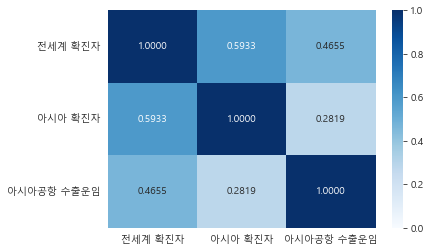

In [329]:
# 아시아공항 수출운임과 전세계 코로나 데이터 간의 상관행렬
df_tmp1 = pd.DataFrame({'전세계 확진자': global_month_cases['확진자'].values, '아시아 확진자': asia_month_cases['아시아총계'].values, '아시아공항 수출운임':df_fare_asia_after['아시아공항'].values})
sns.heatmap(data=df_tmp1.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)
plt.savefig("./picture/fare_relation4.png",dpi=300)

#### 아시아 공항 수출운임과 전세계 코로나 데이터 간의 2차원데이터 시각화

In [333]:
# 아시아공항 수출운임과 전세계 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(global_month_cases['확진자'].values, df_fare_asia_after['아시아공항'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(global_month_cases['확진자'].values.min(), global_month_cases['확진자'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

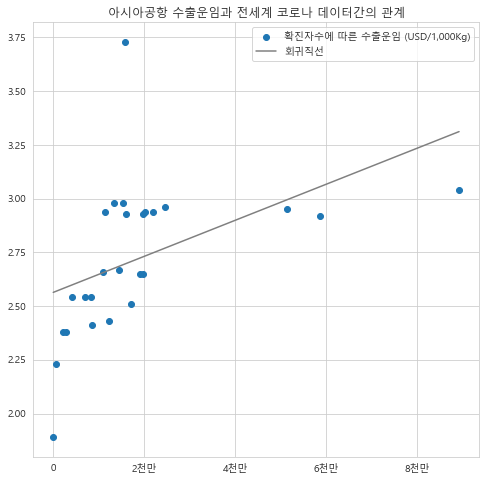

In [334]:
plt.figure(figsize=(8, 8))
plt.title('아시아공항 수출운임과 전세계 코로나 데이터간의 관계')

# 산점도
plt.scatter(global_month_cases['확진자'].values, df_fare_asia_after['아시아공항'].values, label='확진자수에 따른 수출운임 (USD/1,000Kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper right')
plt.xticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])
plt.savefig("./picture/fare_relation5.png",dpi=300)
plt.show()

#### 아시아 공항 수출운임과 아시아 코로나 데이터 간의 2차원데이터 시각화

In [335]:
# 아시아공항 수출운임과 아시아 코로나 데이터 간의 회귀직선 구하기
poly_fit = np.polyfit(asia_month_cases['아시아총계'].values, df_fare_asia_after['아시아공항'].values, 1) 
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(asia_month_cases['아시아총계'].values.min(), asia_month_cases['아시아총계'].values.max()) # x좌표
ys = poly_1d(xs) # y좌표

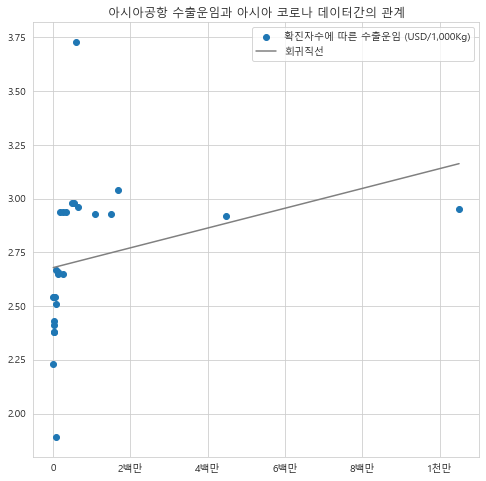

In [336]:
plt.figure(figsize=(8, 8))
plt.title('아시아공항 수출운임과 아시아 코로나 데이터간의 관계')

# 산점도
plt.scatter(asia_month_cases['아시아총계'].values, df_fare_asia_after['아시아공항'].values, label='확진자수에 따른 수출운임 (USD/1,000Kg)')
# 회귀직선
plt.plot(xs, ys, color='gray',label='회귀직선')
# 범례표시
plt.legend(loc='upper right')
plt.xticks(ticks=np.arange(0, 12000000, 2000000), labels=['0','2백만','4백만','6백만','8백만','1천만'])
plt.savefig("./picture/fare_relation6.png",dpi=300)
plt.show()

#### 아시아공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 그래프 표현

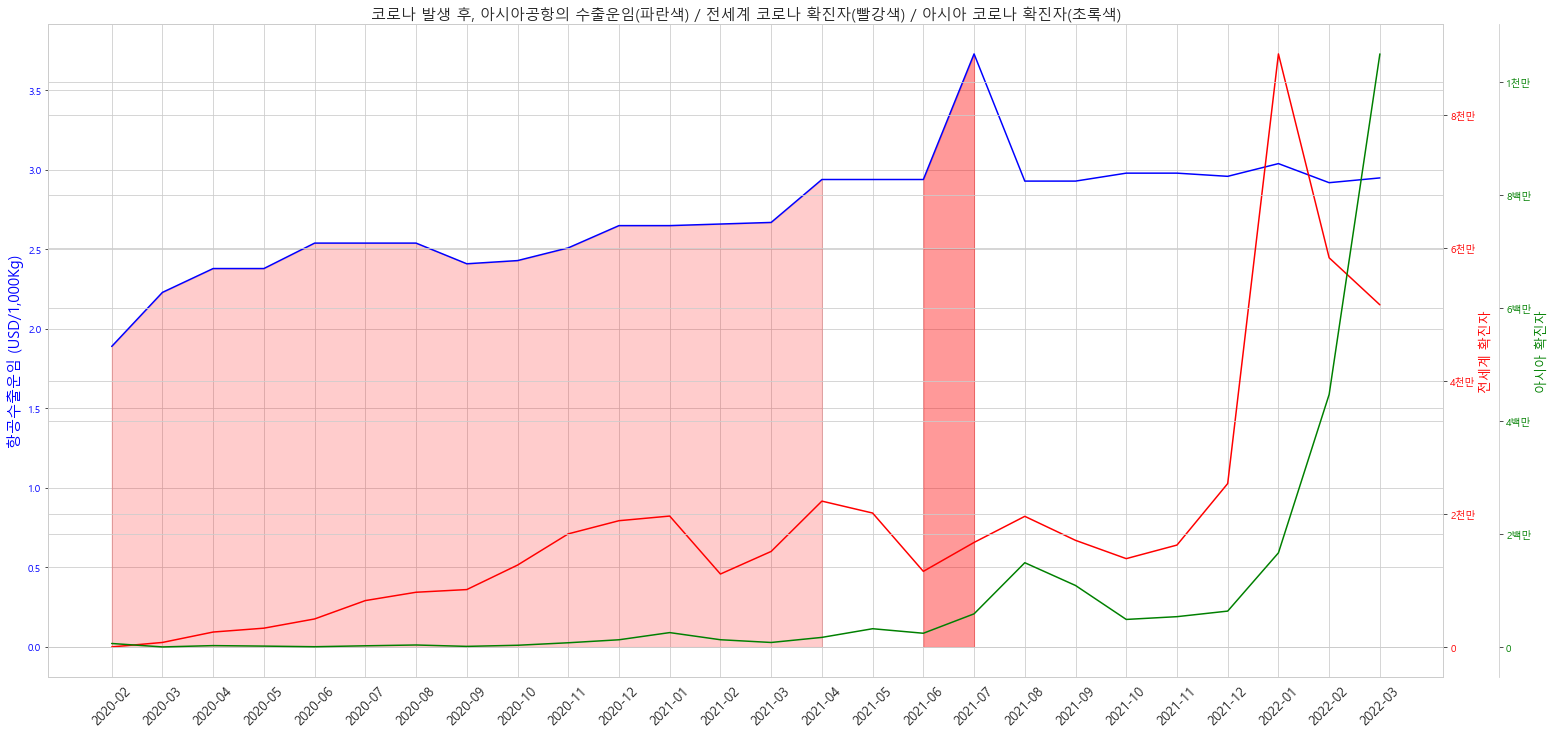

In [318]:
# 아시아공항 코로나 후 월단위 수출운임 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 그래프 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_fare_asia_after.index, df_fare_asia_after['아시아공항'].values, color=color1)
ax1.set_ylabel('항공수출운임 (USD/1,000Kg)', color=color1, fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.fill_between(df_fare_asia_after.loc['2020-02':'2021-04'].index, df_fare_asia_after.loc['2020-02':'2021-04']['아시아공항'].values, color='red', alpha=0.2)
ax1.fill_between(df_fare_asia_after.loc['2021-06':'2021-07'].index, df_fare_asia_after.loc['2021-06':'2021-07']['아시아공항'].values, color='red', alpha=0.4)
ax1.tick_params(axis = 'x', labelsize = 13, rotation=45)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(asia_month_cases.index, asia_month_cases['아시아총계'].values, color=color3)
ax3.set_ylabel('아시아 확진자', color=color3, fontsize=13)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) # 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 12000000, 2000000), labels=['0','2백만','4백만','6백만','8백만','1천만'])

plt.title('코로나 발생 후, 아시아공항의 수출운임(파란색) / 전세계 코로나 확진자(빨강색) / 아시아 코로나 확진자(초록색)', fontsize=15)
plt.savefig("./picture/fare4.png",dpi=300)
plt.show()

In [193]:
df_fare_asia_before = df_air_before_corona[['BEIJING', 'Hangzhou(HGH)', 'Pudong(PVG)', 'Qingdao(TAO)', 'Tianjin(TSN)','Ho_Chi_Minh(SGN)','Penang(PEN)', 'Kuala_Lumpur(KUL)', 'Singapore(SIN)','Hong_Kong(HKG)', 'Narita(NRT)', 'Nagoya(NGO)','Kansai(KIX)']]

In [194]:
asia1 = df_fare_asia_before['BEIJING'].values
asia2 = df_fare_asia_before['Hangzhou(HGH)'].values
asia3 = df_fare_asia_before['Pudong(PVG)'].values
asia4 = df_fare_asia_before['Qingdao(TAO)'].values
asia5 = df_fare_asia_before['Tianjin(TSN)'].values
asia6 = df_fare_asia_before['Ho_Chi_Minh(SGN)'].values
asia7 = df_fare_asia_before['Penang(PEN)'].values
asia8 = df_fare_asia_before['Kuala_Lumpur(KUL)'].values
asia9 = df_fare_asia_before['Singapore(SIN)'].values
asia10 = df_fare_asia_before['Hong_Kong(HKG)'].values
asia11 = df_fare_asia_before['Narita(NRT)'].values
asia12 = df_fare_asia_before['Nagoya(NGO)'].values
asia13 = df_fare_asia_before['Kansai(KIX)'].values
mean_asia = []
for i in range(len(asia1)):
    s = asia1[i] + asia2[i] + asia3[i] + asia4[i] + asia5[i] + asia6[i] + asia7[i] + asia8[i] + asia9[i] + asia10[i] + \
        asia11[i] + asia12[i] + asia13[i]
    m = round(s / 13, 2)
    mean_asia.append(m)
df_fare_asia_before['아시아공항'] = mean_asia

mean_china = []
for i in range(len(asia1)):
    s = asia1[i] + asia2[i] + asia3[i] + asia4[i] + asia5[i]
    m = round(s / 5, 2)
    mean_china.append(m)
df_fare_asia_before['중국공항'] = mean_china

mean_japan = []
for i in range(len(asia1)):
    s = asia11[i] + asia12[i] + asia13[i]
    m = round(s / 3, 2)
    mean_japan.append(m)
df_fare_asia_before['일본공항'] = mean_japan

mean_mala = []
for i in range(len(asia1)):
    s = asia7[i] + asia8[i]
    m = round(s / 2, 2)
    mean_mala.append(m)
df_fare_asia_before['말레이시아공항'] = mean_mala


In [195]:
df_fare_asia_fin = pd.concat([df_fare_asia_before, df_fare_asia_after])
df_fare_asia_fin

공항,BEIJING,Hangzhou(HGH),Pudong(PVG),Qingdao(TAO),Tianjin(TSN),Ho_Chi_Minh(SGN),Penang(PEN),Kuala_Lumpur(KUL),Singapore(SIN),Hong_Kong(HKG),Narita(NRT),Nagoya(NGO),Kansai(KIX),아시아공항,중국공항,일본공항,말레이시아공항
년월,,,,,,,,,,,,,,,,,
2018-01,1.05,1.70,1.11,2.06,1.71,2.01,1.96,2.01,1.46,0.86,0.98,1.04,1.20,1.47,1.53,1.07,1.98
2018-02,1.05,1.70,1.11,2.07,1.70,1.92,1.96,2.01,1.46,0.86,0.97,1.04,1.20,1.47,1.53,1.07,1.98
2018-03,1.05,1.70,1.11,2.08,1.74,1.95,1.96,2.01,1.46,0.86,0.96,1.04,1.19,1.47,1.54,1.06,1.98
2018-04,1.05,1.70,1.11,2.08,1.74,1.90,1.96,2.01,1.46,0.86,0.96,1.04,1.19,1.47,1.54,1.06,1.98
2018-05,1.08,1.80,1.16,2.08,1.74,1.94,2.01,2.06,1.51,0.88,0.99,1.09,1.22,1.50,1.57,1.10,2.04
2018-06,1.04,1.70,1.11,2.05,1.73,1.90,1.96,2.01,1.46,0.84,0.95,1.04,1.18,1.46,1.53,1.06,1.98
2018-07,1.04,1.70,1.11,2.06,1.72,1.88,1.96,2.01,1.46,0.84,0.94,1.04,1.17,1.46,1.53,1.05,1.98
2018-08,1.07,1.80,1.16,2.09,1.75,1.92,2.01,2.06,1.51,0.87,0.98,1.09,1.21,1.50,1.57,1.09,2.04
2018-09,1.06,1.70,1.15,2.27,1.76,1.97,2.20,2.30,1.70,0.86,0.97,1.10,1.23,1.56,1.59,1.10,2.25


#### 아시아공항 코로나 전/후 월단위 수출운임 추이 그래프

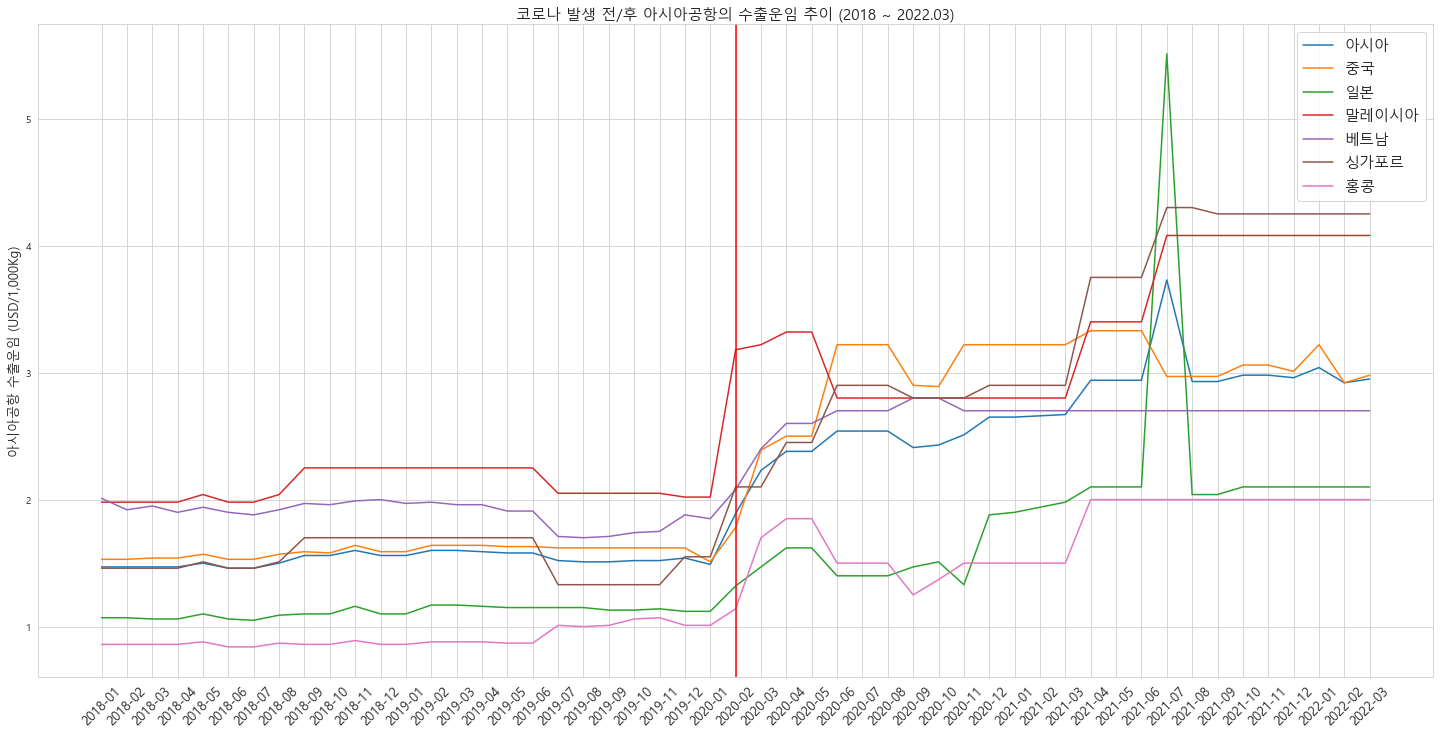

In [325]:
# 아시아공항 코로나 전/후 월단위 수출운임 추이 그래프
plt.figure(figsize=(25,12))

plt.plot(df_fare_asia_fin.index, df_fare_asia_fin['아시아공항'],label='아시아')
plt.plot(df_fare_asia_fin['중국공항'].index, df_fare_asia_fin['중국공항'].values, label='중국')
plt.plot(df_fare_asia_fin['일본공항'].index, df_fare_asia_fin['일본공항'].values, label='일본')
plt.plot(df_fare_asia_fin['말레이시아공항'].index, df_fare_asia_fin['말레이시아공항'].values, label='말레이시아')
plt.plot(df_fare_asia_fin['Ho_Chi_Minh(SGN)'].index, df_fare_asia_fin['Ho_Chi_Minh(SGN)'].values, label='베트남')
plt.plot(df_fare_asia_fin['Singapore(SIN)'].index, df_fare_asia_fin['Singapore(SIN)'].values, label='싱가포르')
plt.plot(df_fare_asia_fin['Hong_Kong(HKG)'].index, df_fare_asia_fin['Hong_Kong(HKG)'].values, label='홍콩')
plt.ylabel('아시아공항 수출운임 (USD/1,000Kg)', fontsize=13)
plt.axvline(x='2020-02', color='r')
plt.legend(fontsize=15)

plt.xticks(rotation=45, fontsize=13)
plt.title('코로나 발생 전/후 아시아공항의 수출운임 추이 (2018 ~ 2022.03)', fontsize=15)
plt.savefig("./picture/fare5.png",dpi=300)
plt.show()

#### 4년 동안의 연도별 아시아공항 항공운임 추이

In [199]:
df_fare_asia_year = df_fare_asia_fin.reset_index()

In [200]:
tmp = list(df_fare_asia_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_fare_asia_year['연'] = tmp

In [201]:
df_fare_asia_year

공항,년월,BEIJING,Hangzhou(HGH),Pudong(PVG),Qingdao(TAO),Tianjin(TSN),Ho_Chi_Minh(SGN),Penang(PEN),Kuala_Lumpur(KUL),Singapore(SIN),Hong_Kong(HKG),Narita(NRT),Nagoya(NGO),Kansai(KIX),아시아공항,중국공항,일본공항,말레이시아공항,연
0,2018-01,1.05,1.70,1.11,2.06,1.71,2.01,1.96,2.01,1.46,0.86,0.98,1.04,1.20,1.47,1.53,1.07,1.98,2018
1,2018-02,1.05,1.70,1.11,2.07,1.70,1.92,1.96,2.01,1.46,0.86,0.97,1.04,1.20,1.47,1.53,1.07,1.98,2018
2,2018-03,1.05,1.70,1.11,2.08,1.74,1.95,1.96,2.01,1.46,0.86,0.96,1.04,1.19,1.47,1.54,1.06,1.98,2018
3,2018-04,1.05,1.70,1.11,2.08,1.74,1.90,1.96,2.01,1.46,0.86,0.96,1.04,1.19,1.47,1.54,1.06,1.98,2018
4,2018-05,1.08,1.80,1.16,2.08,1.74,1.94,2.01,2.06,1.51,0.88,0.99,1.09,1.22,1.50,1.57,1.10,2.04,2018
5,2018-06,1.04,1.70,1.11,2.05,1.73,1.90,1.96,2.01,1.46,0.84,0.95,1.04,1.18,1.46,1.53,1.06,1.98,2018
6,2018-07,1.04,1.70,1.11,2.06,1.72,1.88,1.96,2.01,1.46,0.84,0.94,1.04,1.17,1.46,1.53,1.05,1.98,2018
7,2018-08,1.07,1.80,1.16,2.09,1.75,1.92,2.01,2.06,1.51,0.87,0.98,1.09,1.21,1.50,1.57,1.09,2.04,2018
8,2018-09,1.06,1.70,1.15,2.27,1.76,1.97,2.20,2.30,1.70,0.86,0.97,1.10,1.23,1.56,1.59,1.10,2.25,2018
9,2018-10,1.06,1.70,1.15,2.25,1.75,1.96,2.20,2.30,1.70,0.86,0.97,1.10,1.23,1.56,1.58,1.10,2.25,2018


In [202]:
df_fare_asia_year_group = df_fare_asia_year.groupby(by='연')['아시아공항'].mean()
df_fare_asia_year_group

연
2018    1.506667
2019    1.552500
2020    2.332500
2021    2.942500
2022    2.970000
Name: 아시아공항, dtype: float64

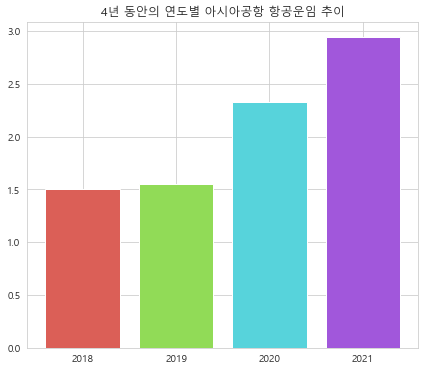

In [322]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_fare_asia_year_group[0:4].index))
plt.bar(df_fare_asia_year_group[0:4].index, df_fare_asia_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 아시아공항 항공운임 추이")
plt.savefig("./picture/fare6.png",dpi=300)
plt.show()

#### 쌍체표본 t검정

In [204]:
# 코로나 전(2019-02 ~ 2020-02) 중/단거리노선의 항공운임데이터
fare_asia_before = df_fare_asia_fin.loc['2019-02':'2020-02']['아시아공항'].values
# 코로나 전(2020-02 ~ 2021-02) 중/단거리노선의 항공운임데이터
fare_asia_after = df_fare_asia_fin.loc['2020-02':'2021-02']['아시아공항'].values

In [205]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(fare_asia_after-fare_asia_before)  # ShapiroResult(statistic=0.8975467681884766, pvalue=0.12375548481941223)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.8975467681884766, pvalue=0.12375548481941223)

In [206]:
# 귀무가설: 코로나로 인한 항공운임의 변화가 없음
# 대립가설 : 코로나로 인해 항공운임이 증가함
ttest_rel(fare_asia_after, fare_asia_before)  # Ttest_relResult(statistic=13.751777035334115, pvalue=1.045176025835997e-08)
# pvalue가 0.05 보다 작으므로 귀무가설을 기각 -> 코로나로 인한 항공운임의 변화가 있음
# 아시아공항으로의 항공운임은 코로나로 인해 증가함

Ttest_relResult(statistic=13.751777035334115, pvalue=1.045176025835997e-08)

### 전세계 항공 수출운임 추이

In [207]:
df_fare_global = (df_fare_asia_fin['아시아공항'] + df_eu_fin['Frankfrut(FRA)'] + df_fare_america_fin['미국공항평균']) / 3
df_fare_global

년월
2018-01     3.053333
2018-02     3.003333
2018-03     3.010000
2018-04     2.983333
2018-05     3.003333
2018-06     2.956667
2018-07     2.960000
2018-08     2.970000
2018-09     3.063333
2018-10     3.100000
2018-11     3.206667
2018-12     3.220000
2019-01     3.053333
2019-02     3.100000
2019-03     3.043333
2019-04     3.023333
2019-05     2.973333
2019-06     2.840000
2019-07     2.656667
2019-08     2.633333
2019-09     2.756667
2019-10     2.740000
2019-11     2.790000
2019-12     2.786667
2020-01     2.733333
2020-02     3.090000
2020-03     3.686667
2020-04     4.546667
2020-05     4.496667
2020-06     4.800000
2020-07     4.866667
2020-08     4.866667
2020-09     5.066667
2020-10     5.930000
2020-11     7.093333
2020-12     7.140000
2021-01     7.140000
2021-02     7.143333
2021-03     7.146667
2021-04     6.903333
2021-05     6.903333
2021-06     6.903333
2021-07     7.166667
2021-08     6.900000
2021-09     6.900000
2021-10    10.093333
2021-11    10.093333
2021-12   

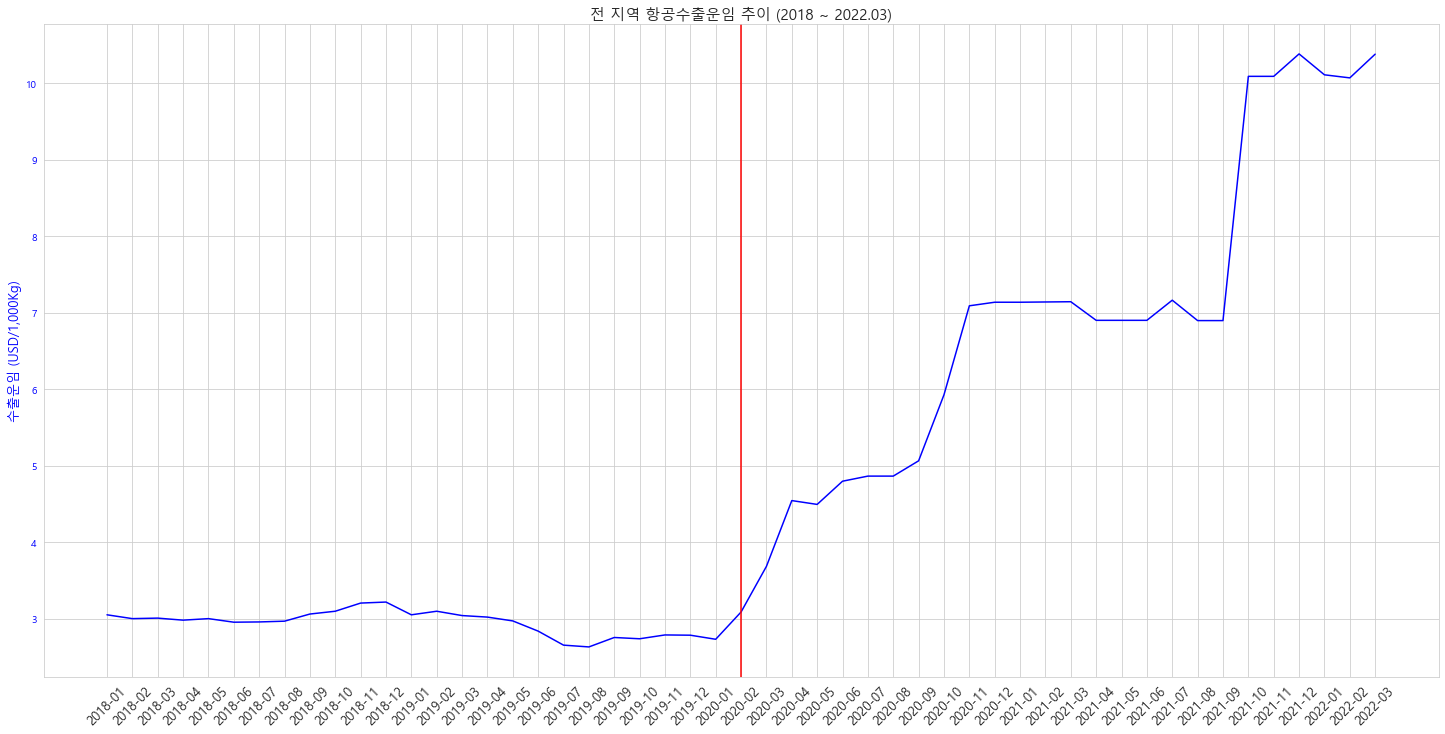

In [368]:
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_fare_global.index, df_fare_global.values, color=color1)
ax1.set_ylabel('수출운임 (USD/1,000Kg)', color=color1, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color1)

plt.xticks(rotation=45, fontsize=13)
plt.axvline(x='2020-02', color='r')
plt.title('전 지역 항공수출운임 추이 (2018 ~ 2022.03)',fontsize=15)
plt.savefig("./picture/fare10.png",dpi=300)
plt.show()

# 항공화물 데이터 분석

In [209]:
df_cargo = pd.read_csv('./data/항공화물.csv')

In [210]:
del df_cargo['Unnamed: 0']

In [211]:
df_cargo

,년월,지역,국가명,화물(톤)
0,2018-01,미주,미국,54339
1,2018-02,미주,미국,46270
2,2018-03,미주,미국,57069
3,2018-04,미주,미국,55639
4,2018-05,미주,미국,58745
...,...,...,...,...
556,2021-11,아시아,홍콩,22802
557,2021-12,아시아,홍콩,23061
558,2022-01,아시아,홍콩,22739
559,2022-02,아시아,홍콩,16623


In [212]:
df_cargo_pt = df_cargo.pivot_table(index='년월', columns='국가명', values='화물(톤)', aggfunc='sum')

In [213]:
df_cargo_pt

국가명,독일,러시아,말레이시아,미국,베트남,싱가포르,이탈리아,일본,중국,프랑스,홍콩
년월,,,,,,,,,,,
2018-01,12656,4344,7541,54339,27635,9262,3345,45067,61175,3345,24325
2018-02,13103,4568,6381,46270,20753,8205,3489,44147,51183,3064,19599
2018-03,15351,4667,7608,57069,27038,10158,4119,50123,65345,3491,24852
2018-04,13798,4833,6988,55639,24464,9933,4205,46022,63762,3590,24472
2018-05,13267,5136,6672,58745,23555,9431,4372,43042,64102,3916,25089
2018-06,13127,5376,6598,60077,24014,8860,4775,43273,61732,4314,24174
2018-07,13301,5825,6817,64079,25783,9819,5010,42816,62878,4371,24676
2018-08,12756,5875,7414,59088,26959,9093,3976,43946,67085,4177,26162
2018-09,13600,5985,6898,56577,26209,9428,4454,42776,67221,4366,25644


## 미국공항(장거리) 항공화물량 분석

In [214]:
df_cargo_america = df_cargo_pt['미국']
df_cargo_america

년월
2018-01    54339
2018-02    46270
2018-03    57069
2018-04    55639
2018-05    58745
2018-06    60077
2018-07    64079
2018-08    59088
2018-09    56577
2018-10    60402
2018-11    58952
2018-12    56195
2019-01    50415
2019-02    43868
2019-03    56073
2019-04    52819
2019-05    55228
2019-06    58301
2019-07    59325
2019-08    56513
2019-09    51911
2019-10    56901
2019-11    56471
2019-12    54869
2020-01    50883
2020-02    47326
2020-03    53208
2020-04    47042
2020-05    54248
2020-06    53228
2020-07    57475
2020-08    55963
2020-09    57417
2020-10    62205
2020-11    60339
2020-12    60937
2021-01    57316
2021-02    56951
2021-03    67916
2021-04    68522
2021-05    75215
2021-06    73746
2021-07    76726
2021-08    75521
2021-09    73517
2021-10    73053
2021-11    71877
2021-12    74757
2022-01    71402
2022-02    60823
2022-03    73228
Name: 미국, dtype: int64

#### 상관성 분석

In [217]:
# 미국공항 화물량과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_cargo_america['2020-02':'2022-03'])) # (0.42415477760529796, 0.03080798872206525)
# p-value가 0.05미만이기 때문에 유의미한 상관성이 존재하고, 상관계수가 0.2~0.5 사이이기 때문에 약한 양의 상관관계를 지닌다.

# 미국공항 화물량과 미국 코로나 데이터 간의 상관관계 분석
print(pearsonr(america_month_cases['미국확진자'].values, df_cargo_america['2020-02':'2022-03'])) # (0.24856899997858234, 0.22078119428936904)
# p-value가 0.05이상이기 떄문에 유의미한 상관성이 존재하지 않음

(0.42415477760529796, 0.03080798872206525)
(0.24856899997858234, 0.22078119428936904)


#### 미국공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 미국 코로나 확진자 데이터로 표현

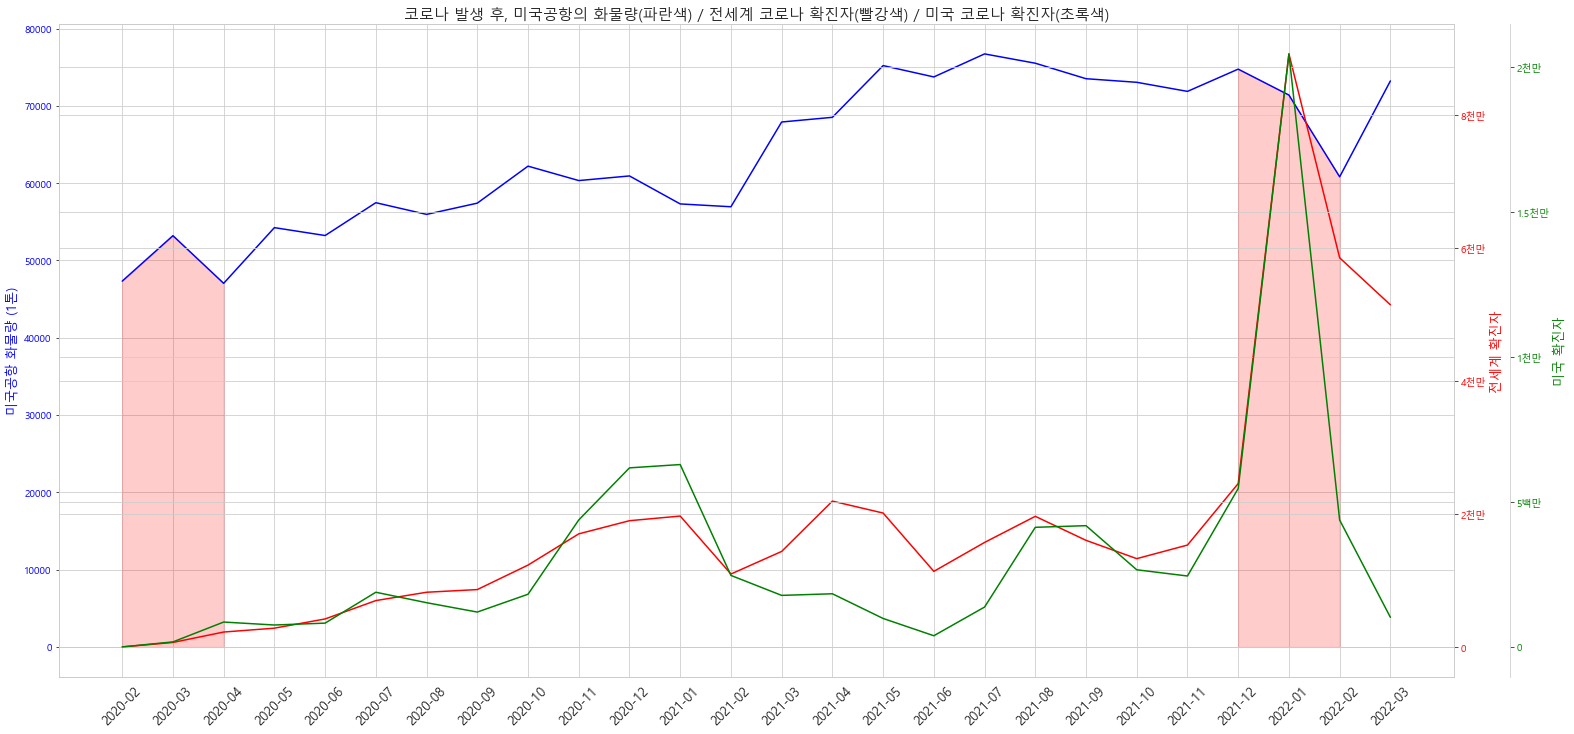

In [344]:
# 미국공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 미국 코로나 확진자 데이터로 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_cargo_america['2020-02':].index, df_cargo_america['2020-02':].values, color=color1)
ax1.set_ylabel('미국공항 화물량 (1톤)', color=color1, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis = 'x', labelsize = 13, rotation=45)
ax1.fill_between(df_cargo_america['2020-02':'2020-04'].index, df_cargo_america['2020-02':'2020-04'].values, color='red', alpha=0.2)
ax1.fill_between(df_cargo_america['2021-12':'2022-02'].index, df_cargo_america['2021-12':'2022-02'].values, color='red', alpha=0.2)


color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(america_month_cases.index, america_month_cases['미국확진자'], color=color3)
ax3.set_ylabel('미국 확진자', color=color3, fontsize=13)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_yticks(ticks=np.arange(0, 25000000, 5000000), labels=['0','5백만','1천만','1.5천만','2천만'])
ax3.spines.right.set_position(("axes", 1.04)) # 오른쪽 옆에 y축 추가

plt.title('코로나 발생 후, 미국공항의 화물량(파란색) / 전세계 코로나 확진자(빨강색) / 미국 코로나 확진자(초록색)', fontsize=15)
plt.savefig("./picture/cargo3.png",dpi=300)
plt.show()

#### 미국공항 코로나 전/후 월단위 화물량 추이 그래프

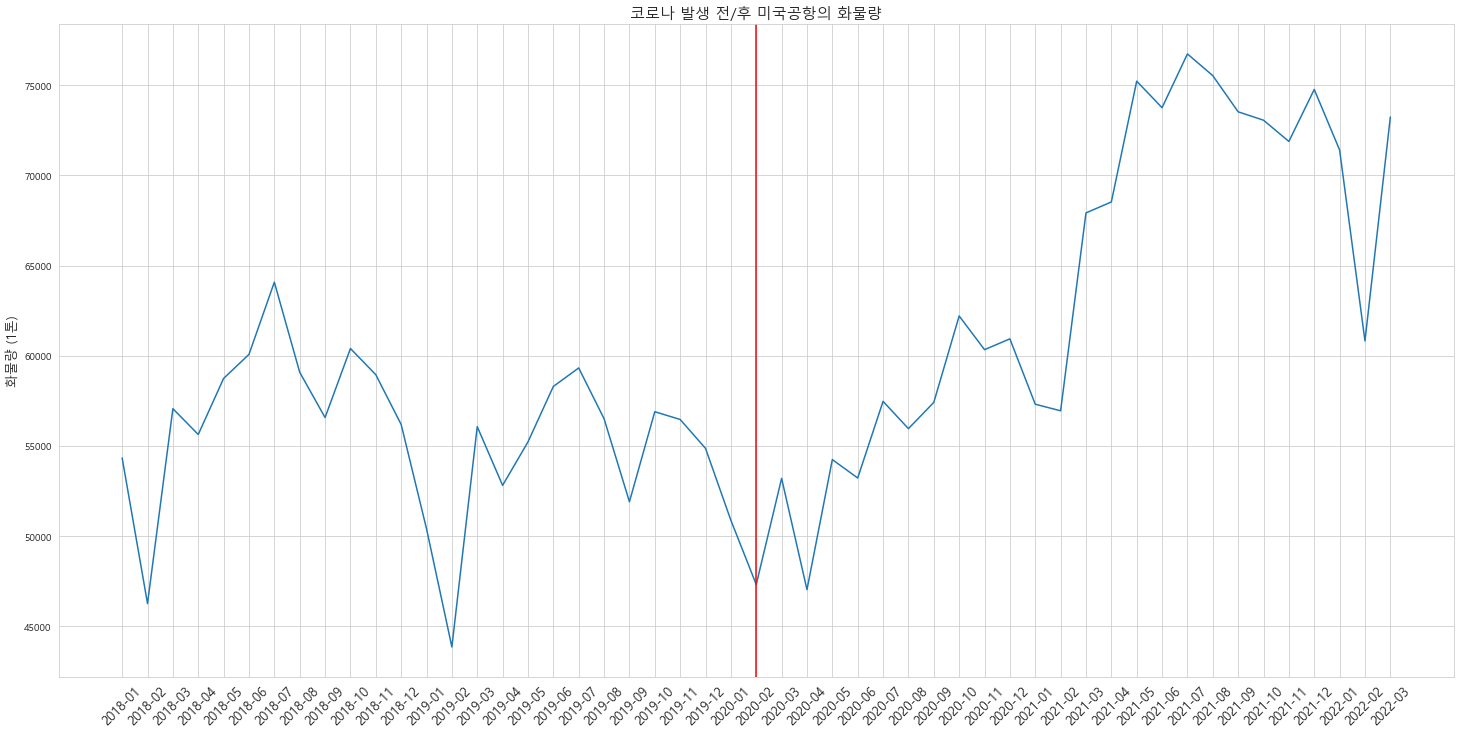

In [339]:
# 미국공항 코로나 전/후 월단위 화물량 추이 그래프
plt.figure(figsize=(25,12))

plt.plot(df_cargo_america['2018-01':].index, df_cargo_america['2018-01':].values)
plt.ylabel('화물량 (1톤)',fontsize=13)
plt.axvline(x='2020-02',color='r')

plt.xticks(rotation=45, fontsize=13)
plt.title('코로나 발생 전/후 미국공항의 화물량', fontsize=15)
plt.savefig("./picture/cargo1.png",dpi=300)
plt.show()

#### 4년 동안의 연도별 미국공항 화물량 추이 그래프

In [221]:
df_cargo_america_year = df_cargo_america.reset_index()

In [222]:
tmp = list(df_cargo_america_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_cargo_america_year['연'] = tmp

In [223]:
df_cargo_america_year

,년월,미국,연
0,2018-01,54339,2018
1,2018-02,46270,2018
2,2018-03,57069,2018
3,2018-04,55639,2018
4,2018-05,58745,2018
5,2018-06,60077,2018
6,2018-07,64079,2018
7,2018-08,59088,2018
8,2018-09,56577,2018
9,2018-10,60402,2018


In [224]:
df_cargo_america_year_group = df_cargo_america_year.groupby(by='연')['미국'].sum()
df_cargo_america_year_group

연
2018    687432
2019    652694
2020    660271
2021    845117
2022    205453
Name: 미국, dtype: int64

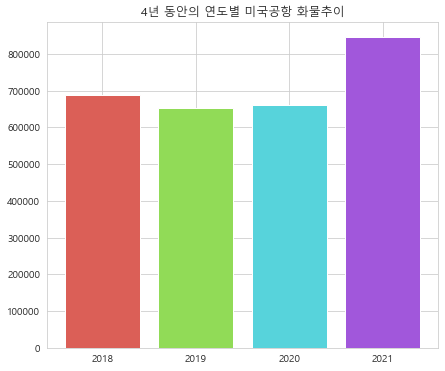

In [340]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_cargo_america_year_group[0:4].index))
plt.bar(df_cargo_america_year_group[0:4].index, df_cargo_america_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 미국공항 화물추이")
plt.savefig("./picture/cargo2.png",dpi=300)
plt.show()

#### 쌍체표본 t검정

In [226]:
# 코로나 전(2019-02 ~ 2020-02) 미국 항공화물량 데이터
df_cargo_america_before = df_cargo_america['2019-02':'2020-02'].values
# 코로나 후(2020-02 ~ 2021-02) 미국 항공화물량 데이터
df_cargo_america_after = df_cargo_america['2020-02':'2021-02'].values
print(df_cargo_america_before)
print(df_cargo_america_after)

[43868 56073 52819 55228 58301 59325 56513 51911 56901 56471 54869 50883
 47326]
[47326 53208 47042 54248 53228 57475 55963 57417 62205 60339 60937 57316
 56951]


In [227]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(df_cargo_america_after-df_cargo_america_before)  # ShapiroResult(statistic=0.9395685195922852, pvalue=0.45133906602859497)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.9395685195922852, pvalue=0.45133906602859497)

In [228]:
# 귀무가설: 코로나로 인한 항공화물량의 변화가 없음
# 대립가설 : 코로나로 인해 항공화물량이 감소함
ttest_rel(df_cargo_america_after, df_cargo_america_before)  # Ttest_relResult(statistic=1.3140170632576231, pvalue=0.2134055542258403)
# pvalue가 0.05 보다 크므로 귀무가설을 채택 -> 코로나로 인한 항공화물량의 변화가 없음
# 미국과의 항공물동량은 코로나로 인한 영향이 없고, 오히려 코로나 이후 항공화물량이 증가함

Ttest_relResult(statistic=1.3140170632576231, pvalue=0.2134055542258403)

## 유럽공항(장거리)항공화물량 분석

In [229]:
df_cargo_europe = df_cargo_pt[['독일', '프랑스', '러시아', '이탈리아']]
df_cargo_europe

국가명,독일,프랑스,러시아,이탈리아
년월,,,,
2018-01,12656,3345,4344,3345
2018-02,13103,3064,4568,3489
2018-03,15351,3491,4667,4119
2018-04,13798,3590,4833,4205
2018-05,13267,3916,5136,4372
2018-06,13127,4314,5376,4775
2018-07,13301,4371,5825,5010
2018-08,12756,4177,5875,3976
2018-09,13600,4366,5985,4454


In [230]:
df_cargo_europe['유럽'] = df_cargo_europe['독일'] + df_cargo_europe['프랑스'] + df_cargo_europe['러시아'] + df_cargo_europe['이탈리아']

In [231]:
df_cargo_europe

국가명,독일,프랑스,러시아,이탈리아,유럽
년월,,,,,
2018-01,12656,3345,4344,3345,23690
2018-02,13103,3064,4568,3489,24224
2018-03,15351,3491,4667,4119,27628
2018-04,13798,3590,4833,4205,26426
2018-05,13267,3916,5136,4372,26691
2018-06,13127,4314,5376,4775,27592
2018-07,13301,4371,5825,5010,28507
2018-08,12756,4177,5875,3976,26784
2018-09,13600,4366,5985,4454,28405


In [232]:
# 유럽 코로나 데이터
eu_month_cases = df_corona.pivot_table(index='월단위 일자',
                                 columns = '국가명(한글)',
                                 values = '확진자',
                                 aggfunc = 'sum')

In [233]:
eu_month_cases = eu_month_cases[['독일', '프랑스', '러시아 연방', '이탈리아']]['2020-02':'2022-03']

In [234]:
eu_month_cases['유럽총계'] = eu_month_cases['독일'] + eu_month_cases['프랑스'] + eu_month_cases['이탈리아'] + eu_month_cases['러시아 연방']

#### 상관성 분석

In [235]:
# 유럽공항 화물량과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(df_cargo_europe['유럽']['2020-02':'2022-03'].values, global_month_cases['확진자'].values)) # (0.15505927643883352, 0.4494348466693642)
# p-value가 0.05이상이기 때문에 유의미한 상관성이 존재하지 않는다.

# 유럽공항 화물량과 유럽 코로나 데이터 간의 상관관계 분석
print(pearsonr(eu_month_cases['유럽총계'].values, df_cargo_europe['유럽']['2020-02':'2022-03'].values)) # (0.13667351284975895, 0.505563517670322)
# p-value가 0.05이상이기 때문에 유의미한 상관성이 존재하지 않는다.

(0.15505927643883352, 0.4494348466693642)
(0.13667351284975895, 0.505563517670322)


#### 유럽공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 유럽 코로나 확진자 데이터로 표현

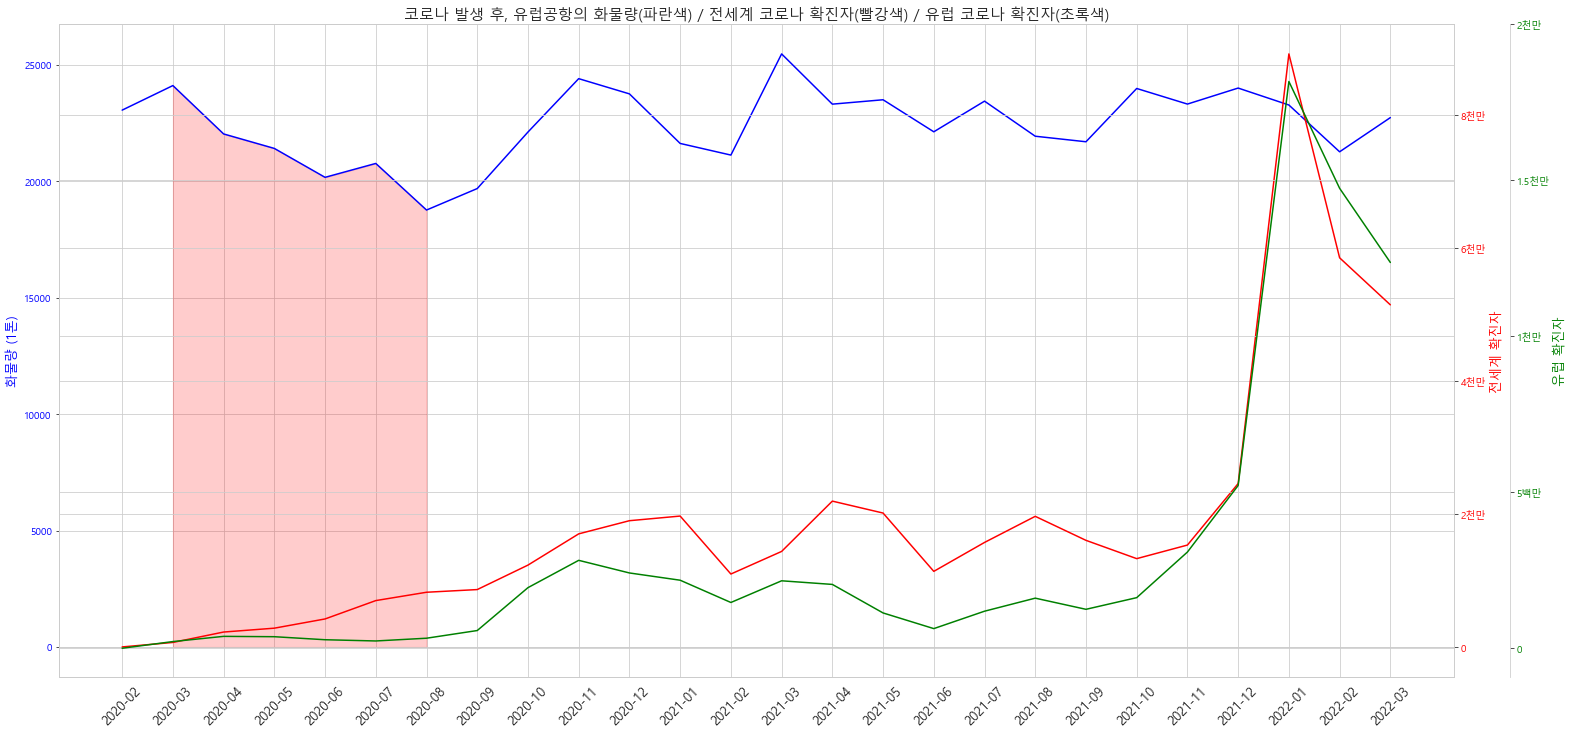

In [363]:
# 유럽공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 유럽 코로나 확진자 데이터로 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_cargo_europe['유럽']['2020-02':].index, df_cargo_europe['유럽']['2020-02':].values, color=color1)
ax1.set_ylabel('화물량 (1톤)', color=color1, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.fill_between(df_cargo_europe['유럽']['2020-03':'2020-08'].index, df_cargo_europe['유럽']['2020-03':'2020-08'].values, color='red', alpha=0.2)
ax1.tick_params(axis = 'x', labelsize = 13, rotation=45)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(eu_month_cases.index, eu_month_cases['유럽총계'], color=color3)
ax3.set_ylabel('유럽 확진자', color=color3, fontsize=13)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) ## 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 25000000, 5000000), labels=['0','5백만','1천만','1.5천만','2천만'])

plt.title('코로나 발생 후, 유럽공항의 화물량(파란색) / 전세계 코로나 확진자(빨강색) / 유럽 코로나 확진자(초록색)', fontsize=15)
plt.savefig("./picture/cargo6.png",dpi=300)

plt.show()

#### 유럽공항 코로나 전/후 월단위 화물량 추이 그래프

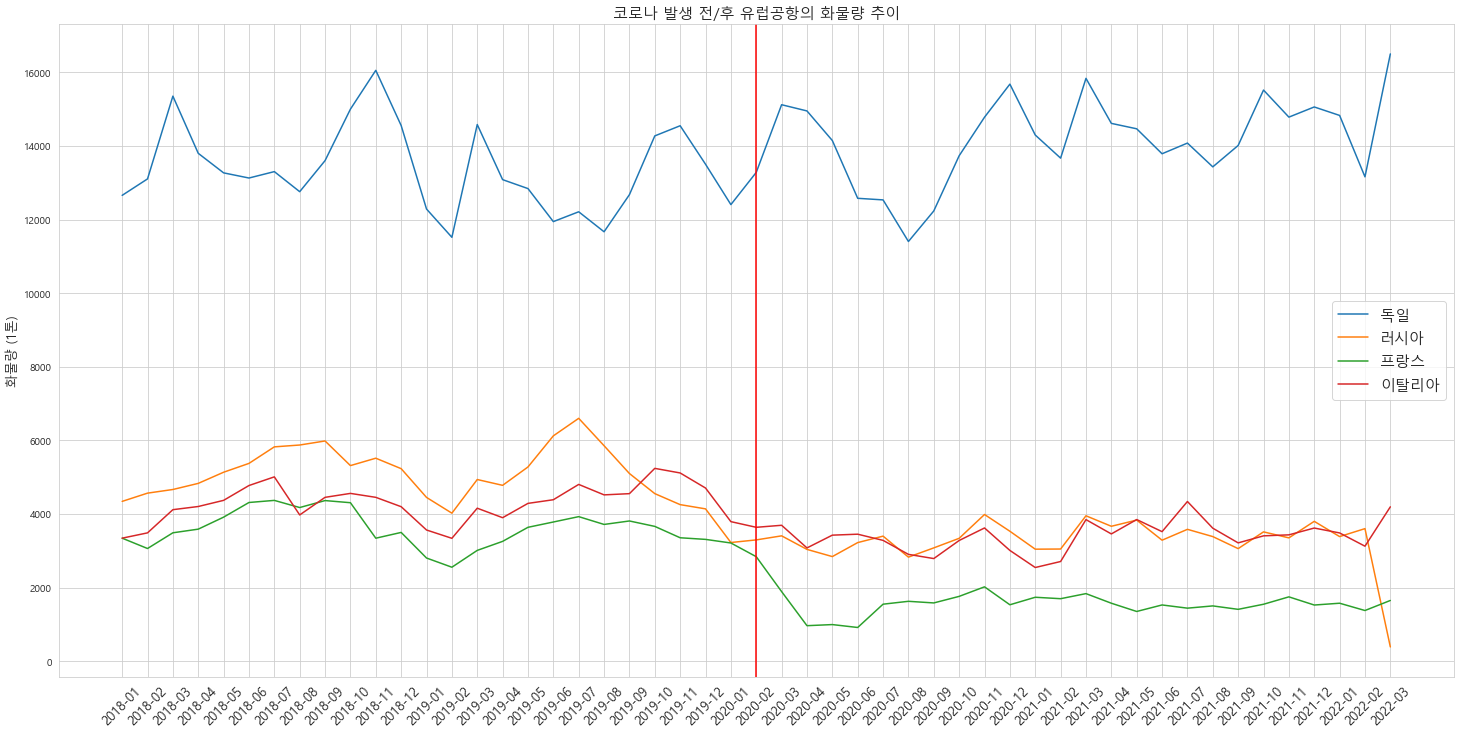

In [346]:
# 유럽공항 코로나 전/후 월단위 화물량 추이 그래프
plt.figure(figsize=(25,12))

plt.plot(df_cargo_europe['독일']['2018-01':].index, df_cargo_europe['독일']['2018-01':].values, label='독일')
plt.plot(df_cargo_europe['러시아']['2018-01':].index, df_cargo_europe['러시아']['2018-01':].values, label='러시아')
plt.plot(df_cargo_europe['프랑스']['2018-01':].index, df_cargo_europe['프랑스']['2018-01':].values, label='프랑스')
plt.plot(df_cargo_europe['이탈리아']['2018-01':].index, df_cargo_europe['이탈리아']['2018-01':].values, label='이탈리아')
plt.ylabel('화물량 (1톤)', fontsize=13)
plt.axvline(x='2020-02', color='r')
plt.legend(loc='right',fontsize=15)

plt.xticks(rotation=45, fontsize=13)
plt.title('코로나 발생 전/후 유럽공항의 화물량 추이', fontsize=15)
plt.savefig("./picture/cargo4.png",dpi=300)
plt.show()

#### 4년 동안의 연도별 유럽공항 화물량 추이 그래프

In [244]:
df_cargo_europe_year = df_cargo_europe.reset_index()

In [245]:
tmp = list(df_cargo_europe_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_cargo_europe_year['연'] = tmp

In [246]:
df_cargo_europe_year

국가명,년월,독일,프랑스,러시아,이탈리아,유럽,연
0,2018-01,12656,3345,4344,3345,23690,2018
1,2018-02,13103,3064,4568,3489,24224,2018
2,2018-03,15351,3491,4667,4119,27628,2018
3,2018-04,13798,3590,4833,4205,26426,2018
4,2018-05,13267,3916,5136,4372,26691,2018
5,2018-06,13127,4314,5376,4775,27592,2018
6,2018-07,13301,4371,5825,5010,28507,2018
7,2018-08,12756,4177,5875,3976,26784,2018
8,2018-09,13600,4366,5985,4454,28405,2018
9,2018-10,14998,4308,5316,4561,29183,2018


In [247]:
df_cargo_europe_year_group = df_cargo_europe_year.groupby(by='연')['유럽'].sum()
df_cargo_europe_year_group

연
2018    325984
2019    308667
2020    262958
2021    275588
2022     67288
Name: 유럽, dtype: int64

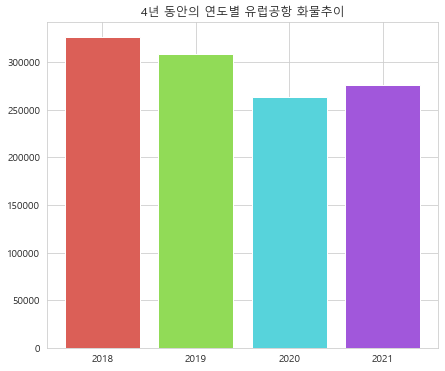

In [347]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_cargo_europe_year_group[0:4].index))
plt.bar(df_cargo_europe_year_group[0:4].index, df_cargo_europe_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 유럽공항 화물추이")
plt.savefig("./picture/cargo5.png",dpi=300)
plt.show()

#### 쌍체표본 t검정

In [249]:
# 코로나 전(2019-02 ~ 2020-02) 유럽 항공화물량 데이터
df_cargo_europe_before = df_cargo_europe['유럽']['2019-02':'2020-02'].values
# 코로나 후(2020-02 ~ 2021-02) 유럽 항공화물량 데이터
df_cargo_europe_after = df_cargo_europe['유럽']['2020-02':'2021-02'].values
print(df_cargo_europe_before)
print(df_cargo_europe_after)

[21438 26690 25022 26049 26240 27545 25762 26142 27732 27275 25662 22640
 23060]
[23060 24115 22037 21415 20173 20770 18768 19691 22119 24412 23758 21629
 21129]


In [250]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(df_cargo_europe_after-df_cargo_europe_before)  # ShapiroResult(statistic=0.9326276183128357, pvalue=0.36871102452278137)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.9326276183128357, pvalue=0.36871102452278137)

In [251]:
    # 귀무가설: 코로나로 인한 항공화물량의 변화가 없음
    # 대립가설 : 코로나로 인해 항공화물량이 감소함
    ttest_rel(df_cargo_europe_after, df_cargo_europe_before)  # Ttest_relResult(statistic=-5.099697320000249, pvalue=0.00026193488611420845)
    # pvalue가 0.05보다 작으므로 귀무가설을 기각 -> 코로나로 인해 항공화물량의 변화가 있음
    # 통계량이 음수 : 코로나로 인해 항공화물량이 감소함

Ttest_relResult(statistic=-5.099697320000249, pvalue=0.00026193488611420845)

## (중/단거리) 아시아공항 항공화물량 분석

In [252]:
df_cargo_asia = df_cargo_pt[['말레이시아', '베트남', '싱가포르', '일본', '중국', '홍콩']]

In [253]:
df_cargo_asia['아시아'] = df_cargo_asia['말레이시아'] + df_cargo_asia['베트남'] + df_cargo_asia['싱가포르'] + df_cargo_asia['일본'] + df_cargo_asia['중국'] + df_cargo_asia['홍콩']

In [254]:
df_cargo_asia

국가명,말레이시아,베트남,싱가포르,일본,중국,홍콩,아시아
년월,,,,,,,
2018-01,7541,27635,9262,45067,61175,24325,175005
2018-02,6381,20753,8205,44147,51183,19599,150268
2018-03,7608,27038,10158,50123,65345,24852,185124
2018-04,6988,24464,9933,46022,63762,24472,175641
2018-05,6672,23555,9431,43042,64102,25089,171891
2018-06,6598,24014,8860,43273,61732,24174,168651
2018-07,6817,25783,9819,42816,62878,24676,172789
2018-08,7414,26959,9093,43946,67085,26162,180659
2018-09,6898,26209,9428,42776,67221,25644,178176


#### 상관성 분석

In [255]:
# 아시아공항 화물량과 전세계 코로나 데이터 간의 상관관계 분석
print(pearsonr(global_month_cases['확진자'].values, df_cargo_asia['아시아']['2020-02':'2022-03'].values)) # (0.6914518178173505, 0.00018256545733427498)
# p-value가 0.05이상이기 때문에 유의미한 상관성이 존재하지 않는다.

# 아시아공항 화물량과 아시아 코로나 데이터 간의 상관관계 분석
print(pearsonr(asia_month_cases['아시아총계'].values, df_cargo_asia['아시아']['2020-02':'2022-03'].values)) # (0.43632797416032626, 0.033039560163045864)
# p-value가 0.05이상이기 때문에 유의미한 상관성이 존재하지 않는다.

(0.1642223562616555, 0.42275268100342794)
(0.11333966703103729, 0.581441797511696)


#### 아시아공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 표현

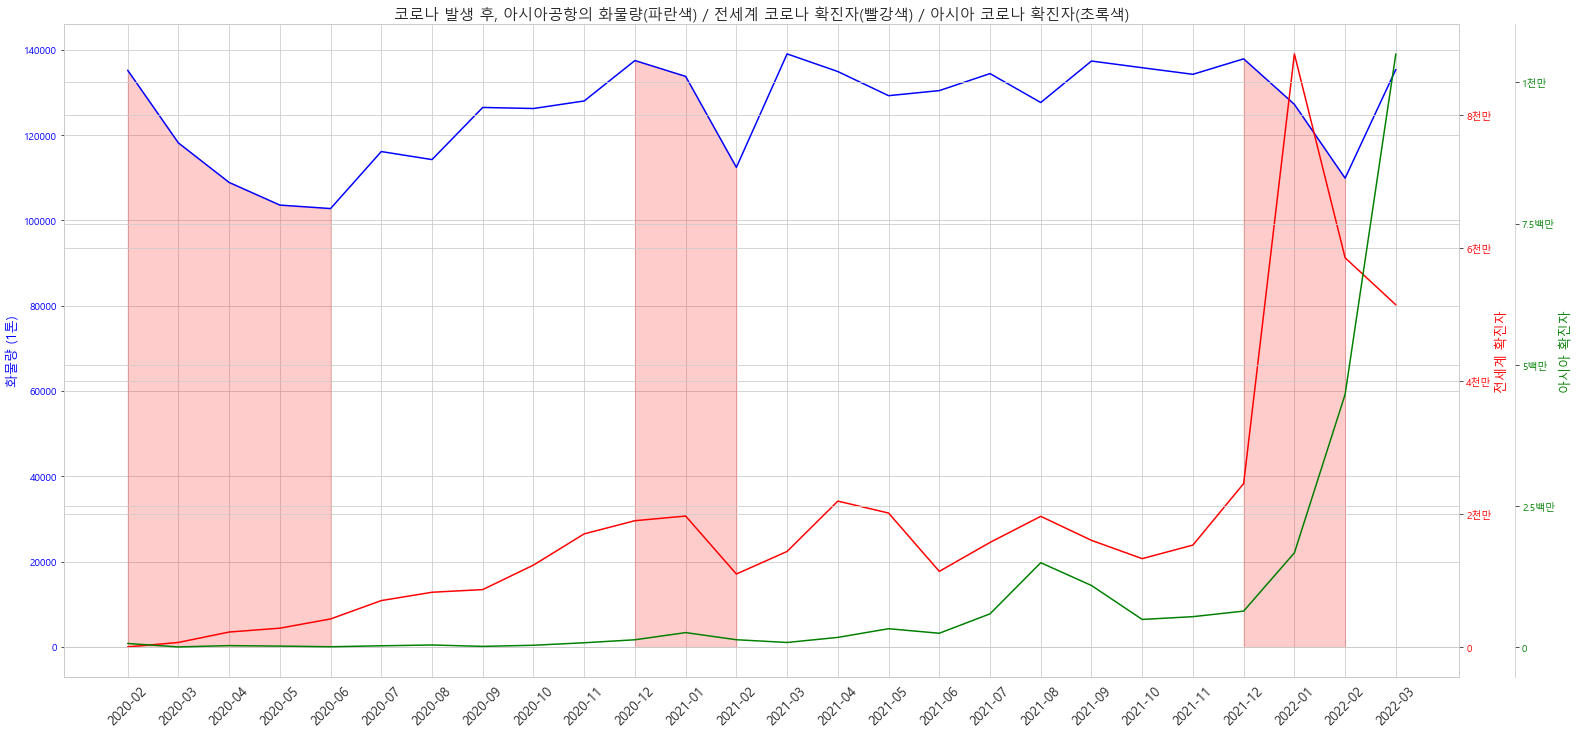

In [362]:
# 아시아공항 코로나 후 월단위 화물량 추이 그래프 / 전세계 코로나 확진자 데이터 / 아시아 코로나 확진자 데이터로 표현
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_cargo_asia['아시아']['2020-02':].index, df_cargo_asia['아시아']['2020-02':].values, color=color1)
ax1.set_ylabel('화물량 (1톤)', color=color1, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.fill_between(df_cargo_asia['아시아']['2020-02':'2020-06'].index, df_cargo_asia['아시아']['2020-02':'2020-06'].values, color='red', alpha=0.2)
ax1.fill_between(df_cargo_asia['아시아']['2020-12':'2021-02'].index, df_cargo_asia['아시아']['2020-12':'2021-02'].values, color='red', alpha=0.2)
ax1.fill_between(df_cargo_asia['아시아']['2021-12':'2022-02'].index, df_cargo_asia['아시아']['2021-12':'2022-02'].values, color='red', alpha=0.2)
ax1.tick_params(axis = 'x', labelsize = 13, rotation=45)
    
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(global_month_cases.index, global_month_cases['확진자'], color=color2)
ax2.set_ylabel('전세계 확진자', color=color2, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks(ticks=np.arange(0, 100000000, 20000000), labels=['0','2천만','4천만','6천만','8천만'])

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(asia_month_cases.index, asia_month_cases['아시아총계'].values, color=color3)
ax3.set_ylabel('아시아 확진자', color=color3, fontsize=13)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.04)) ## 오른쪽 옆에 y축 추가
ax3.set_yticks(ticks=np.arange(0, 12500000, 2500000), labels=['0','2.5백만','5백만','7.5백만','1천만'])

plt.title('코로나 발생 후, 아시아공항의 화물량(파란색) / 전세계 코로나 확진자(빨강색) / 아시아 코로나 확진자(초록색)',fontsize=15)
plt.savefig("./picture/cargo9.png",dpi=300)
plt.show()

#### 아시아공항 코로나 전/후 월단위 화물량 추이 그래프

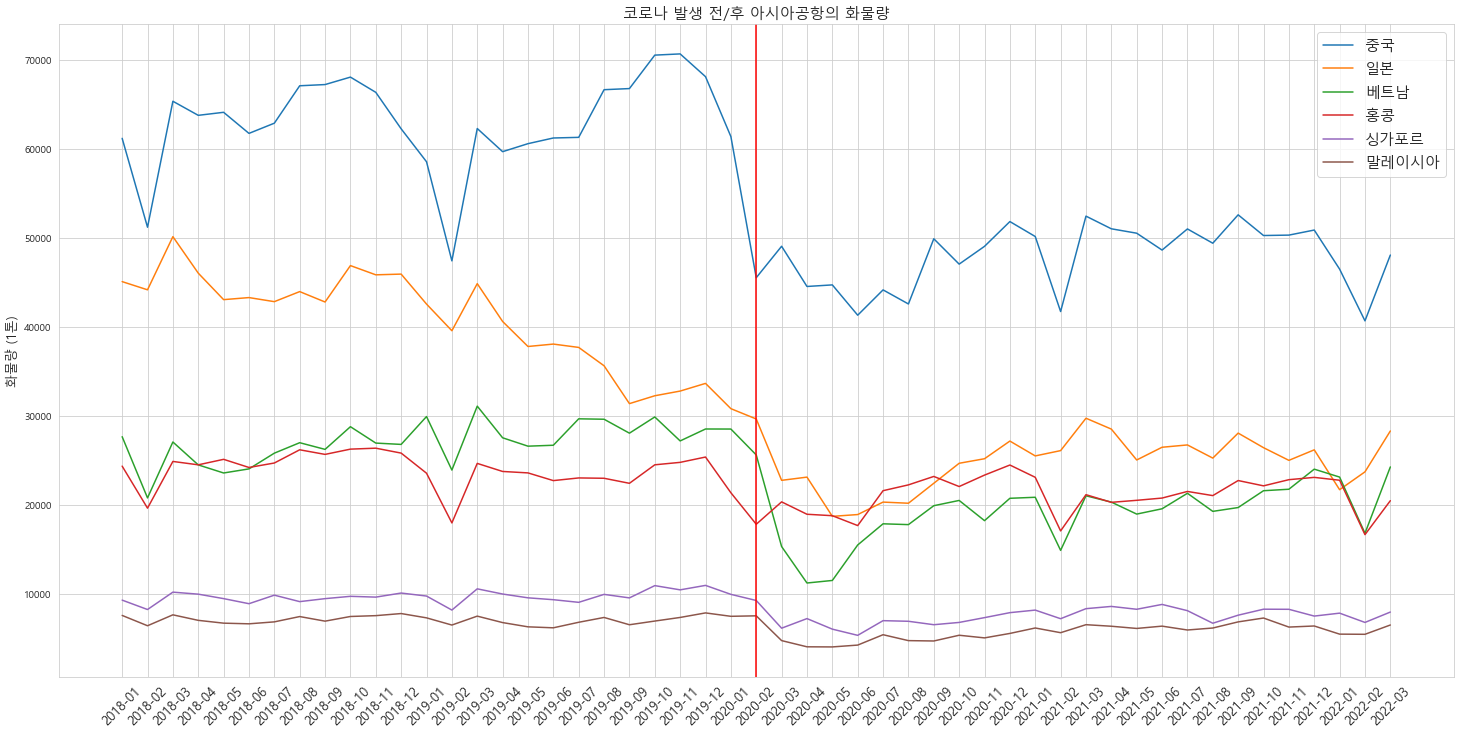

In [360]:
# 아시아공항 코로나 전/후 월단위 화물량 추이 그래프
plt.figure(figsize=(25,12))

plt.plot(df_cargo_asia['중국']['2018-01':].index, df_cargo_asia['중국']['2018-01':].values, label='중국')
plt.plot(df_cargo_asia['일본']['2018-01':].index, df_cargo_asia['일본']['2018-01':].values, label='일본')
plt.plot(df_cargo_asia['베트남']['2018-01':].index, df_cargo_asia['베트남']['2018-01':].values, label='베트남')
plt.plot(df_cargo_asia['홍콩']['2018-01':].index, df_cargo_asia['홍콩']['2018-01':].values, label='홍콩')
plt.plot(df_cargo_asia['싱가포르']['2018-01':].index, df_cargo_asia['싱가포르']['2018-01':].values, label='싱가포르')
plt.plot(df_cargo_asia['말레이시아']['2018-01':].index, df_cargo_asia['말레이시아']['2018-01':].values, label='말레이시아')
plt.ylabel('화물량 (1톤)',fontsize=13)
plt.axvline(x='2020-02', color='r')
plt.legend(loc='upper right',fontsize=15)
plt.xticks(rotation=45, fontsize=13)
plt.title('코로나 발생 전/후 아시아공항의 화물량',fontsize=15)
plt.savefig("./picture/cargo7.png",dpi=300)
plt.show()

#### 4년 동안의 연도별 아시아공항 화물량 추이 그래프

In [261]:
df_cargo_asia_year = df_cargo_asia.reset_index()

In [262]:
tmp = list(df_cargo_asia_year['년월'])
for i in range(len(tmp)):
    tmp[i] = tmp[i][0:4]
df_cargo_asia_year['연'] = tmp

In [263]:
df_cargo_asia_year

국가명,년월,말레이시아,베트남,싱가포르,일본,중국,홍콩,아시아,연
0,2018-01,7541,27635,9262,45067,61175,24325,175005,2018
1,2018-02,6381,20753,8205,44147,51183,19599,150268,2018
2,2018-03,7608,27038,10158,50123,65345,24852,185124,2018
3,2018-04,6988,24464,9933,46022,63762,24472,175641,2018
4,2018-05,6672,23555,9431,43042,64102,25089,171891,2018
5,2018-06,6598,24014,8860,43273,61732,24174,168651,2018
6,2018-07,6817,25783,9819,42816,62878,24676,172789,2018
7,2018-08,7414,26959,9093,43946,67085,26162,180659,2018
8,2018-09,6898,26209,9428,42776,67221,25644,178176,2018
9,2018-10,7422,28758,9689,46869,68059,26236,187033,2018


In [264]:
df_cargo_asia_year_group = df_cargo_asia_year.groupby(by='연')['아시아'].sum()
df_cargo_asia_year_group

연
2018    2106315
2019    2018484
2020    1476712
2021    1587289
2022     372520
Name: 아시아, dtype: int64

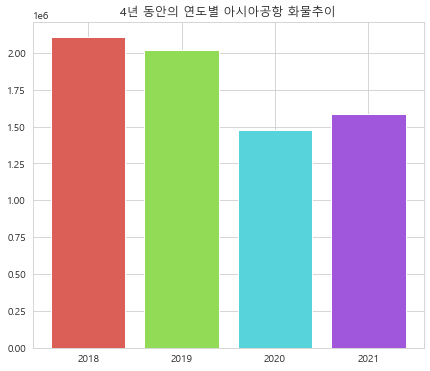

In [354]:
plt.figure(figsize=(7,6))
colors = sns.color_palette('hls',len(df_cargo_asia_year_group[0:4].index))
plt.bar(df_cargo_asia_year_group[0:4].index, df_cargo_asia_year_group[0:4].values, color = colors)
plt.title("4년 동안의 연도별 아시아공항 화물추이")
plt.savefig("./picture/cargo8.png",dpi=300)
plt.show()

#### 쌍체표본 t검정

In [266]:
# 코로나 후(2019-02 ~ 2020-02) 아시아 항공화물량 데이터
df_cargo_asia_before = df_cargo_asia['아시아']['2019-02':'2020-02'].values
# 코로나 후(2020-02 ~ 2021-02) 아시아 항공화물량 데이터
df_cargo_asia_after = df_cargo_asia['아시아']['2020-02':'2021-02'].values
print(df_cargo_asia_before)
print(df_cargo_asia_after)

[143378 180814 168185 164264 164090 167383 172028 164551 174894 173070
 174324 159339 135226]
[135226 118181 108913 103603 102787 116151 114269 126491 126247 128014
 137491 133773 112443]


In [267]:
# 집단간 차이에 대한 정규성 검정
# 귀무가설 : 집단간 차이는 정규성을 띈다
# 대립가설 : 집단간 차이는 정규성을 띄지 않는다
shapiro(df_cargo_asia_after-df_cargo_asia_before)  # ShapiroResult(statistic=0.9008469581604004, pvalue=0.1373559534549713)
# pvalue가 0.05보다 크므로 귀무가설 채택 -> 정규성을 띈다

ShapiroResult(statistic=0.9008469581604004, pvalue=0.1373559534549713)

In [268]:
# 귀무가설: 코로나로 인한 항공화물량의 변화가 없음
# 대립가설 : 코로나로 인해 항공화물량이 감소함
ttest_rel(df_cargo_asia_after, df_cargo_asia_before)  # Ttest_relResult(statistic=-9.279627486430908, pvalue=7.983163910283864e-07)
# pvalue가 0.05보다 작으므로 귀무가설을 기각 -> 코로나로 인한 항공화물량의 변화가 있음
# 통계량이 음수 : 코로나로 인해 항공화물량이 감소함

Ttest_relResult(statistic=-9.279627486430908, pvalue=7.983163910283864e-07)

### 전세계 항공화물량 추이

In [269]:
df_cargo_global = df_cargo_asia['아시아'] + df_cargo_europe['유럽'] + df_cargo_america
df_cargo_global

년월
2018-01    253034
2018-02    220762
2018-03    269821
2018-04    257706
2018-05    257327
2018-06    256320
2018-07    265375
2018-08    266531
2018-09    263158
2018-10    276618
2018-11    270874
2018-12    262205
2019-01    245028
2019-02    208684
2019-03    263577
2019-04    246026
2019-05    245541
2019-06    248631
2019-07    254253
2019-08    254303
2019-09    242604
2019-10    259527
2019-11    256816
2019-12    254855
2020-01    232862
2020-02    205612
2020-03    195504
2020-04    177992
2020-05    179266
2020-06    176188
2020-07    194396
2020-08    189000
2020-09    203599
2020-10    210571
2020-11    212765
2020-12    222186
2021-01    212718
2021-02    190523
2021-03    232438
2021-04    226750
2021-05    227974
2021-06    226317
2021-07    234602
2021-08    225115
2021-09    232592
2021-10    232851
2021-11    229459
2021-12    236655
2022-01    221899
2022-02    192005
2022-03    231357
dtype: int64

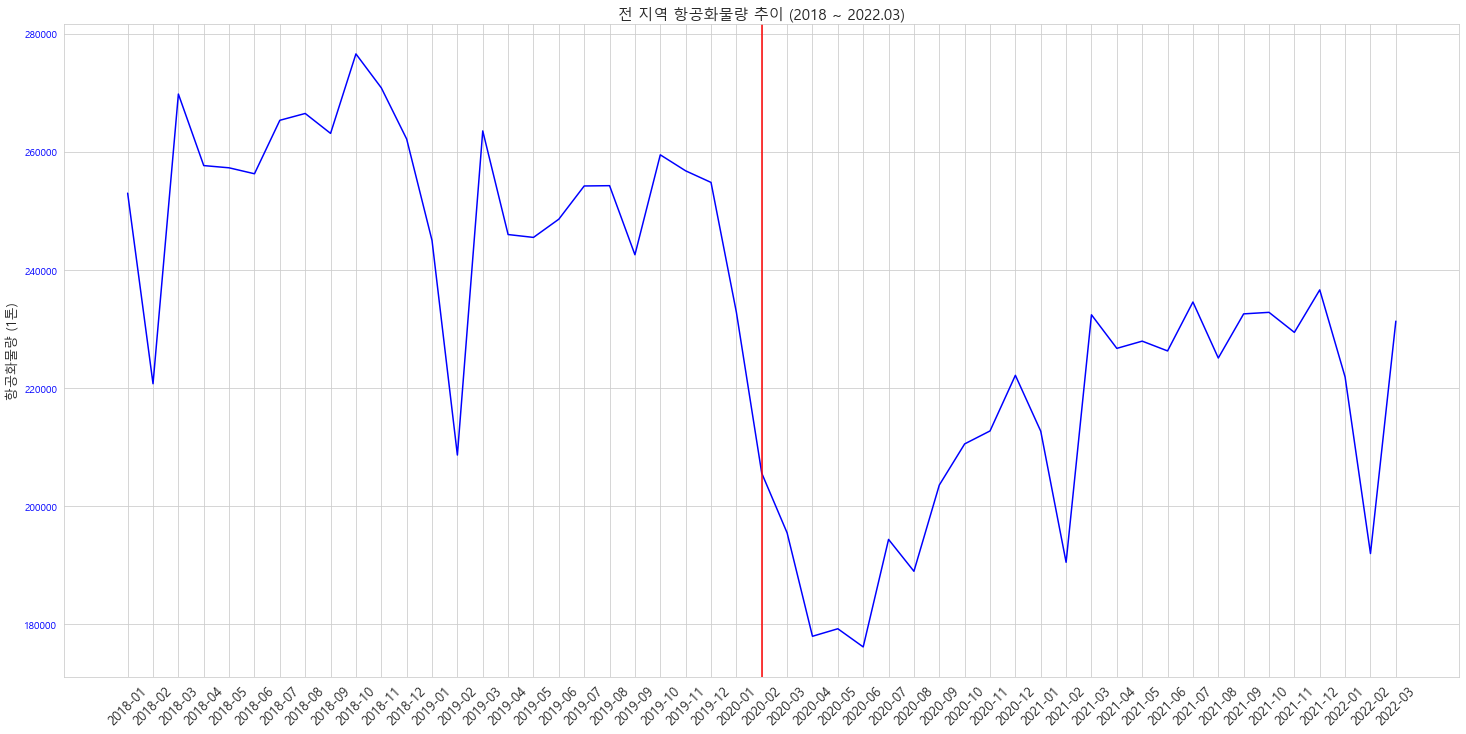

In [367]:
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(df_cargo_global.index, df_cargo_global.values, color=color1)
ax1.set_ylabel('항공화물량 (1톤)', fontsize=13)
ax1.tick_params(axis='y', labelcolor=color1)

plt.xticks(rotation=45, fontsize=13)
plt.axvline(x='2020-02', color='r')
plt.title('전 지역 항공화물량 추이 (2018 ~ 2022.03)',fontsize=15)
plt.savefig("./picture/cargo10.png",dpi=300)
plt.show()

## 코로나와 항공운임, 항공화물량 간의 관계

In [271]:
df_fin_asia = pd.DataFrame({'전세계확진자':global_month_cases['확진자'], '아시아확진자':asia_month_cases['아시아총계'], '화물량':df_cargo_asia['아시아']['2020-02':], '항공운임':df_fare_asia_after['아시아공항']})

<AxesSubplot:>

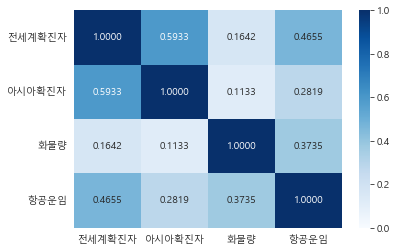

In [272]:
sns.heatmap(data=df_fin_asia.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

In [273]:
df_fin_europe = pd.DataFrame({'전세계확진자':global_month_cases['확진자'],'유럽확진자':eu_month_cases['유럽총계'], '화물량':df_cargo_europe['유럽']['2020-02':], '항공운임':df_fare_germany_after['Frankfrut(FRA)']})

<AxesSubplot:>

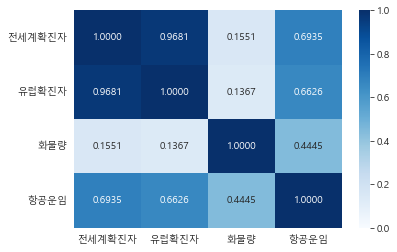

In [274]:
sns.heatmap(data=df_fin_europe.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

In [276]:
df_fin_america = pd.DataFrame({'전세계확진자':global_month_cases['확진자'], '미국확진자':america_month_cases['미국확진자'], '화물량':df_cargo_america['2020-02':], '항공운임':df_fare_america_after['미국공항평균']})

<AxesSubplot:>

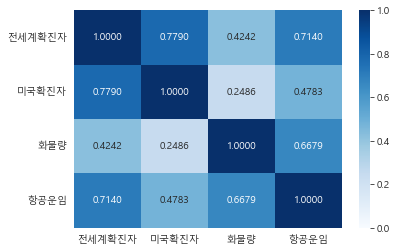

In [277]:
sns.heatmap(data=df_fin_america.corr(), annot=True, cmap='Blues', fmt='.4f', vmin=0, vmax=1)

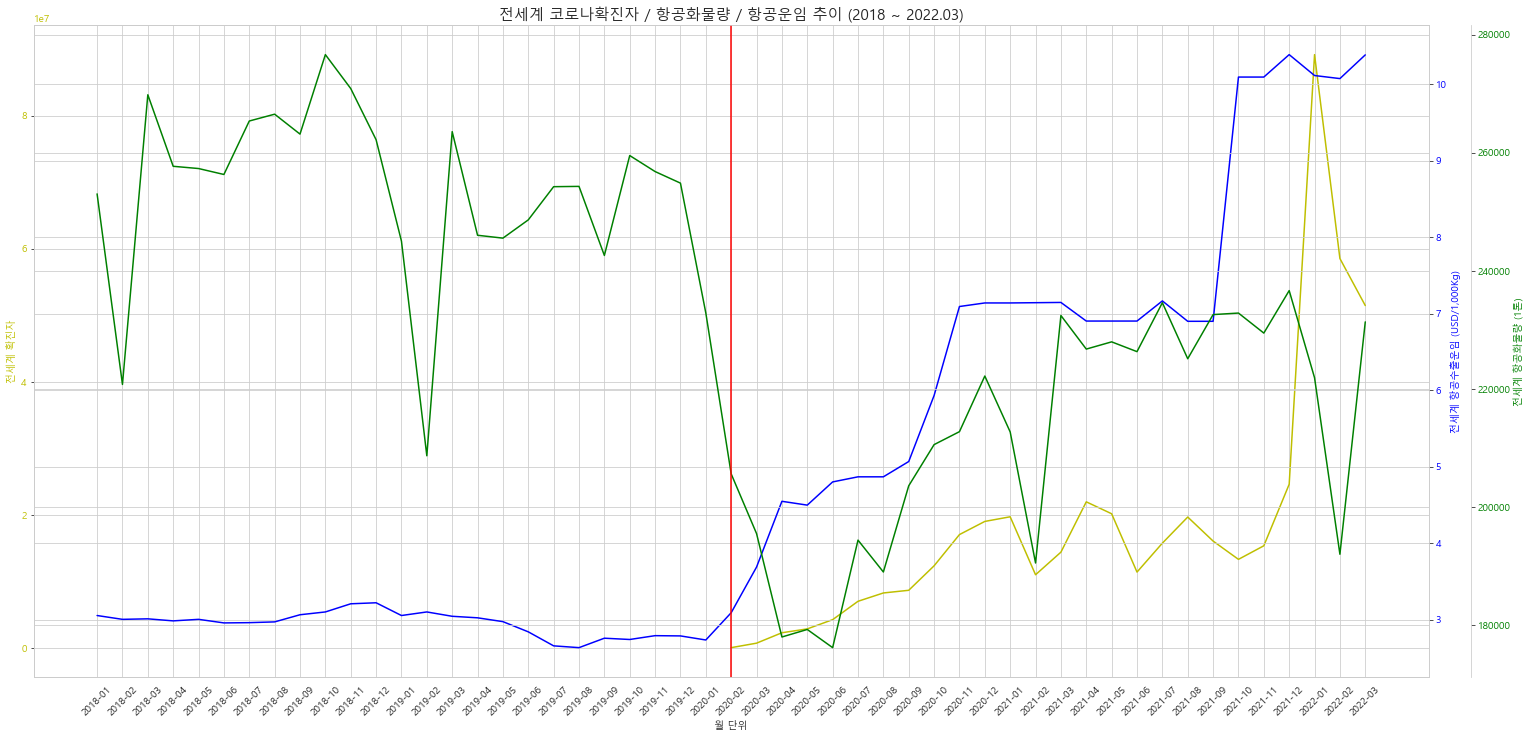

In [278]:
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'y'
ax1.plot(global_month_cases.index, global_month_cases['확진자'], color=color1)
ax1.set_xlabel('월 단위')
ax1.set_ylabel('전세계 확진자', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', labelrotation=45)

color2 = 'b'
ax2 = ax1.twinx()
ax2.plot(df_fare_global.index, df_fare_global.values, color=color2)
ax2.set_ylabel('전세계 항공수출운임 (USD/1,000Kg)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(df_cargo_global.index, df_cargo_global.values, color=color3)
ax3.set_ylabel('전세계 항공화물량 (1톤)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.03)) ## 오른쪽 옆에 y축 추가

plt.axvline(x='2020-02', color='r')
plt.title('전세계 코로나확진자 / 항공화물량 / 항공운임 추이 (2018 ~ 2022.03)', fontsize=15)
plt.show()